## IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
warnings.filterwarnings("ignore")

### READING THE SENTIMENT DATASET USED AS A YARDSTICK

In [2]:
data_1 = pd.read_csv("C:/Users/Hp/Documents/ML/data.csv")

In [3]:
data_1.head()

,Unnamed: 0,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,32666,2/1/2021,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,29639,2/1/2021,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE
2,29613,2/1/2021,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE
3,39638,2/1/2021,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE
4,32660,2/1/2021,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [4]:
# drop the unnamed column
data_1 = data_1.drop("Unnamed: 0", axis=1)

In [5]:
data_1["new_coins"].unique()

array(['(bitcoin)', '(btc)', '(doge)', ..., '(binance,usdt,aave)',
       '(doge,hbar,ksm,inj,usdt,matic)', '(xrp,algo)'], dtype=object)

In [6]:
# parse the date column
data_1["created_at"] = pd.to_datetime(data_1["created_at"])

#### DATAFRAME NEW OUTLOOK

In [7]:
data_1.head()

,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,2021-02-01,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,2021-02-01,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE
2,2021-02-01,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE
3,2021-02-01,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE
4,2021-02-01,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


### SHOWING THE SENTIMENTS FOR THE SELECTED COINS USING COUNTPLOTS

In [8]:
data_1["new_coins"].unique()

array(['(bitcoin)', '(btc)', '(doge)', ..., '(binance,usdt,aave)',
       '(doge,hbar,ksm,inj,usdt,matic)', '(xrp,algo)'], dtype=object)

In [9]:
selected_coins = ["(bitcoin)", "(doge)", "(xrp,algo)", "(binance,usdt,aave)", "(btc)"]

In [10]:
filtered_df = data_1[data_1["new_coins"].isin(selected_coins)]

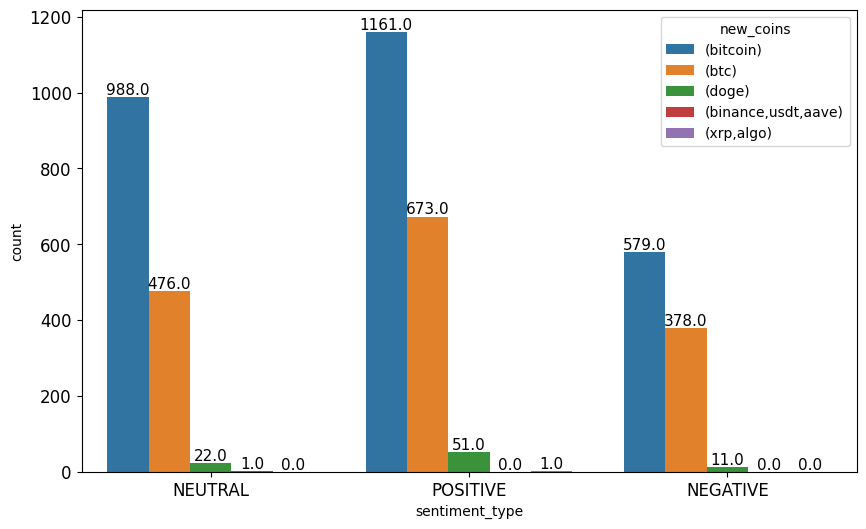

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="sentiment_type", hue="new_coins", data=filtered_df)
for i in ax.patches:
    ax.annotate(f"{i.get_height()}", (i.get_x() + i.get_width() / 2., i.get_height()), ha="center", va="center", fontsize=11,
    color = "black", xytext = (0, 5), textcoords = "offset points")
    ax.tick_params(axis="both", which="major", labelsize=12)
plt.show()

## READING THE DATASET WITH HISTORICAL PRICES

In [12]:
dataset2 = pd.read_csv("C:/Users/Hp/Documents/ML/dataset.csv")

In [13]:
dataset2.head()

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [14]:
# dropping the unnamed column
dataset2.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
# checking the unique values in the dataset
dataset2["crypto_name"].unique()

array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
       'Tether', 'Ethereum', 'Ethereum Classic', 'Maker',
       'Basic Attention Token', 'EOS', 'Bitcoin Cash', 'BNB', 'TRON',
       'Decentraland', 'Chainlink', 'Cardano', 'Filecoin',
       'Theta Network', 'Huobi Token', 'Ravencoin', 'Tezos', 'VeChain',
       'Quant', 'USD Coin', 'Cronos', 'Wrapped Bitcoin', 'Cosmos',
       'Polygon', 'OKB', 'UNUS SED LEO', 'Algorand', 'Chiliz',
       'THORChain', 'Terra Classic', 'FTX Token', 'Hedera', 'Binance USD',
       'Dai', 'Solana', 'Avalanche', 'Shiba Inu', 'The Sandbox',
       'Polkadot', 'Elrond', 'Uniswap', 'Aave', 'NEAR Protocol', 'Flow',
       'Internet Computer', 'Casper', 'Toncoin', 'Chain', 'ApeCoin',
       'Aptos'], dtype=object)

In the yardstick dataset, the top cryptocurrencies there are bitcoin, Dogecoin, XRP and usdt(tether) so we will have to pull these out from the train dataset.

### SAMPLING THE DATAFRAME FOR THE MAIN COINS

In [16]:
selected_coins = ["Bitcoin", "Dogecoin", "XRP", "Tether"]

In [17]:
new_data = dataset2[dataset2["crypto_name"].isin(selected_coins)]

In [18]:
new_data.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07
7,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin,2013-05-08
9,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin,2013-05-09


#### checking for missing values

In [19]:
new_data.isna().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

### VIEWING THE DATA ON EACH COIN

#### bitcoin

In [20]:
btc = new_data.loc[new_data["crypto_name"] == "Bitcoin"].copy()

In [21]:
btc = btc.set_index("date")
btc.index = pd.to_datetime(btc.index)
btc.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2013-05-05,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin
2013-05-06,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin
2013-05-07,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin
2013-05-08,109.599998,115.779999,109.599998,113.566002,0.0,1.264049e+09,2013-05-08T23:59:59.999Z,Bitcoin
2013-05-09,113.199997,113.459999,109.260002,112.669998,0.0,1.254535e+09,2013-05-09T23:59:59.999Z,Bitcoin


### VISUALIZE EXTRACTED DATA

Text(0.5, 1.0, 'Btc plot for overall period')

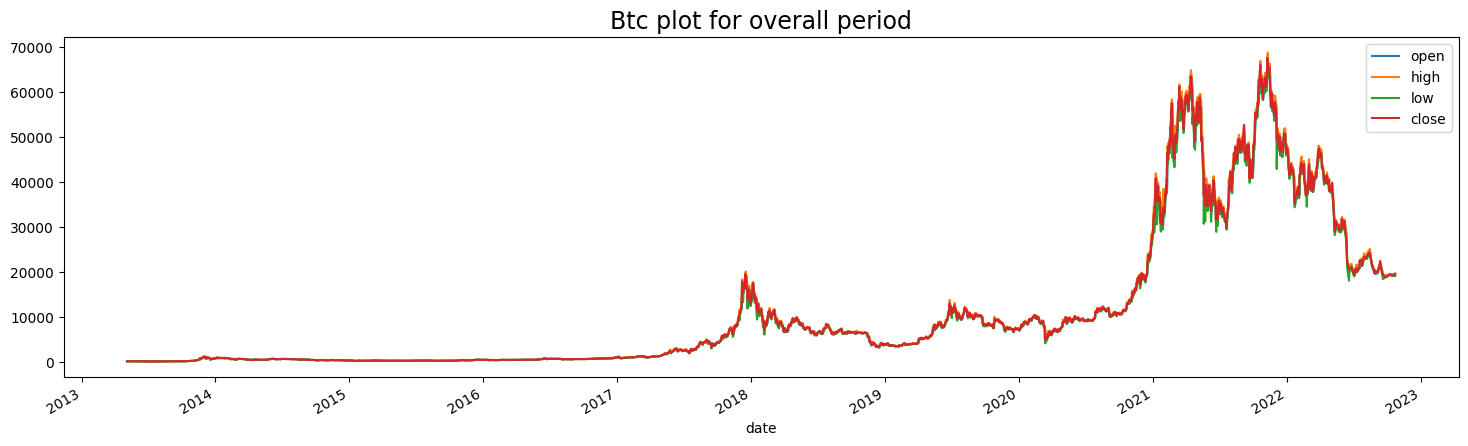

In [22]:
btc[["open", "high", "low", "close"]].plot(figsize=(18, 5))
plt.title("Btc plot for overall period", fontsize=17)

In [23]:
# top 5 dates with highest price for BTC
btc.sort_values(by="high", ascending=False).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2021-11-10,66953.339374,68789.625939,63208.114998,64995.229391,4.873083e+10,1.226432e+12,2021-11-10T23:59:59.999Z,Bitcoin
2021-11-09,67549.735581,68530.339686,66382.061008,66971.828097,4.235799e+10,1.263667e+12,2021-11-09T23:59:59.999Z,Bitcoin
2021-11-08,63344.067222,67673.739123,63344.067222,67566.830088,4.112561e+10,1.274831e+12,2021-11-08T23:59:59.999Z,Bitcoin
2021-10-20,64284.586188,66930.387271,63610.674992,65992.837036,4.078896e+10,1.243927e+12,2021-10-20T23:59:59.999Z,Bitcoin
2021-10-21,66002.232204,66600.546808,62117.408714,62210.173076,4.590812e+10,1.172684e+12,2021-10-21T23:59:59.999Z,Bitcoin


In [24]:
# top 5 dates with lowest price for BTC
btc.sort_values(by="low", ascending=True).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2013-07-05,79.989998,80.000000,65.526001,68.431000,0.0,7.784112e+08,2013-07-05T23:59:59.999Z,Bitcoin
2013-07-07,68.749001,74.561096,66.620003,74.561096,0.0,8.488390e+08,2013-07-07T23:59:59.999Z,Bitcoin
2013-07-06,68.504997,75.000000,66.820000,70.277298,0.0,7.997416e+08,2013-07-06T23:59:59.999Z,Bitcoin
2013-07-04,78.889999,83.105003,72.000000,80.525803,0.0,9.156186e+08,2013-07-04T23:59:59.999Z,Bitcoin
2013-07-09,76.000000,78.300003,72.519997,76.694000,0.0,8.738418e+08,2013-07-09T23:59:59.999Z,Bitcoin


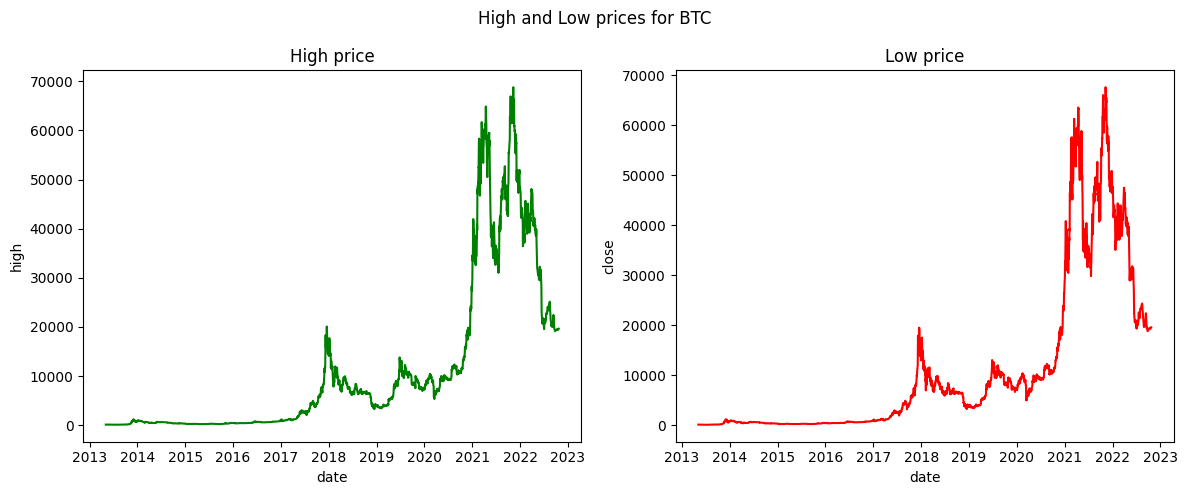

In [25]:
# high and low price per period of time visualization
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
fig.suptitle("High and Low prices for BTC")
sns.lineplot(ax=axes[0], y=btc["high"], x=btc.index, color="green")
axes[0].set_title("High price")
sns.lineplot(ax=axes[1], y=btc["close"], x=btc.index, color="red")
axes[1].set_title("Low price")
plt.tight_layout()
plt.show()

#### dogecoin

In [26]:
doge = new_data.loc[new_data["crypto_name"] == "Dogecoin"].copy()

In [27]:
doge = doge.set_index("date")
doge.index = pd.to_datetime(doge.index)
doge.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2013-12-15,0.000559,0.000904,0.000290,0.000298,0.0,1.960300e+06,2013-12-15T23:59:59.999Z,Dogecoin
2013-12-16,0.000299,0.000866,0.000150,0.000205,0.0,1.509085e+06,2013-12-16T23:59:59.999Z,Dogecoin
2013-12-17,0.000207,0.000289,0.000116,0.000269,0.0,2.169688e+06,2013-12-17T23:59:59.999Z,Dogecoin
2013-12-18,0.000267,0.000362,0.000205,0.000362,0.0,3.188943e+06,2013-12-18T23:59:59.999Z,Dogecoin
2013-12-19,0.000395,0.001520,0.000328,0.001162,0.0,1.115034e+07,2013-12-19T23:59:59.999Z,Dogecoin


### VISUALS

Text(0.5, 1.0, 'Doge plot for overall period')

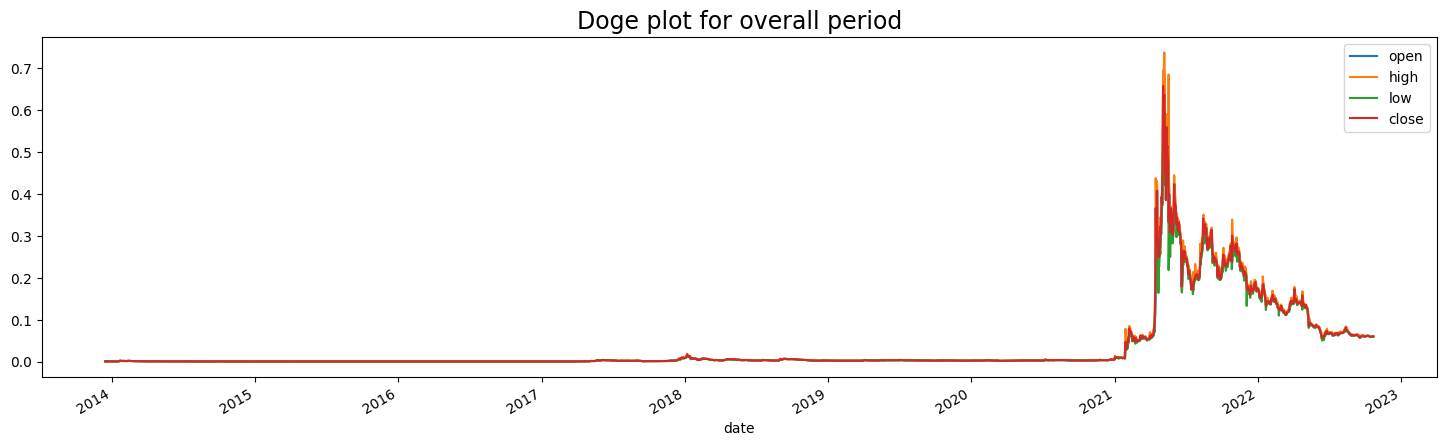

In [28]:
doge[["open", "high", "low", "close"]].plot(figsize=(18, 5))
plt.title("Doge plot for overall period", fontsize=17)

In [29]:
# top 5 dates with highest price for Doge
doge.sort_values(by="high", ascending=False).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2021-05-08,0.687801,0.737567,0.608168,0.636439,2.555513e+10,8.242978e+10,2021-05-08T23:59:59.999Z,Dogecoin
2021-05-09,0.635820,0.697625,0.425706,0.570070,4.613806e+10,7.384194e+10,2021-05-09T23:59:59.999Z,Dogecoin
2021-05-05,0.537355,0.695262,0.523822,0.657633,4.252510e+10,8.514718e+10,2021-05-05T23:59:59.999Z,Dogecoin
2021-05-19,0.476435,0.684735,0.218267,0.333123,1.507262e+10,4.319498e+10,2021-05-19T23:59:59.999Z,Dogecoin
2021-05-06,0.652842,0.663616,0.545102,0.580804,1.898990e+10,7.520778e+10,2021-05-06T23:59:59.999Z,Dogecoin


In [30]:
# top 5 dates with lowest price for Doge
doge.sort_values(by="low", ascending=True).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2015-05-07,0.000087,0.000089,0.000085,0.000089,34179.199219,8.835114e+06,2015-05-07T23:59:59.999Z,Dogecoin
2015-05-06,0.000089,0.000090,0.000087,0.000087,42631.000000,8.665941e+06,2015-05-06T23:59:59.999Z,Dogecoin
2015-05-08,0.000089,0.000094,0.000087,0.000092,37627.199219,9.154713e+06,2015-05-08T23:59:59.999Z,Dogecoin
2015-05-05,0.000089,0.000090,0.000088,0.000089,63171.699219,8.857446e+06,2015-05-05T23:59:59.999Z,Dogecoin
2015-05-11,0.000090,0.000094,0.000088,0.000093,52099.199219,9.203321e+06,2015-05-11T23:59:59.999Z,Dogecoin


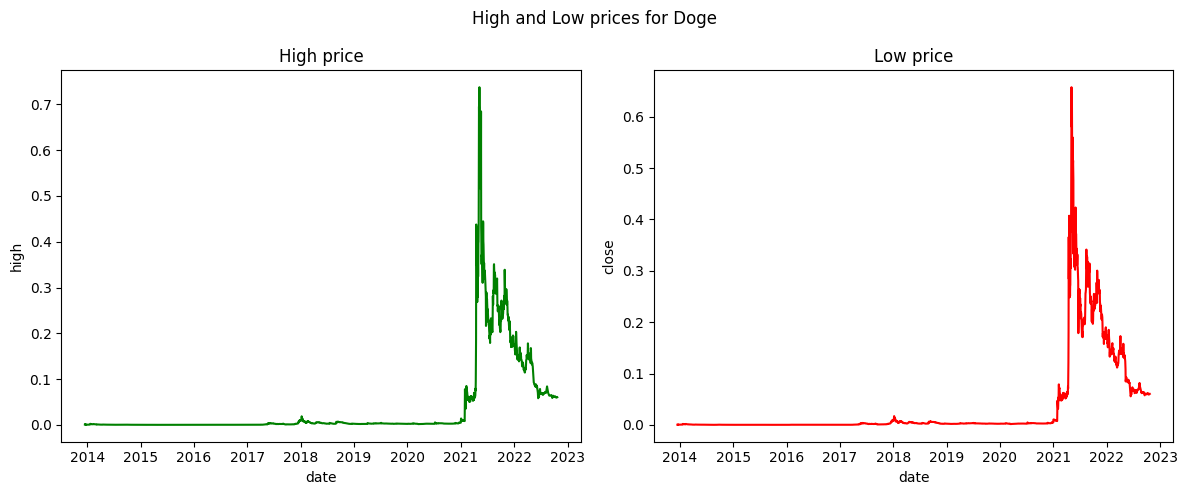

In [31]:
# high and low price per period of time visualization
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
fig.suptitle("High and Low prices for Doge")
sns.lineplot(ax=axes[0], y=doge["high"], x=doge.index, color="green")
axes[0].set_title("High price")
sns.lineplot(ax=axes[1], y=doge["close"], x=doge.index, color="red")
axes[1].set_title("Low price")
plt.tight_layout()
plt.show()

#### xrp

In [32]:
xrp = new_data.loc[new_data["crypto_name"] == "XRP"].copy()

In [33]:
xrp = xrp.set_index("date")
xrp.index = pd.to_datetime(xrp.index)
xrp.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2013-08-04,0.005874,0.005927,0.005874,0.005882,0.0,4.598358e+07,2013-08-04T23:59:59.999Z,XRP
2013-08-05,0.005875,0.005980,0.005613,0.005613,0.0,4.387916e+07,2013-08-05T23:59:59.999Z,XRP
2013-08-06,0.005637,0.005661,0.004629,0.004680,0.0,3.659101e+07,2013-08-06T23:59:59.999Z,XRP
2013-08-07,0.004669,0.004682,0.004333,0.004417,0.0,3.453412e+07,2013-08-07T23:59:59.999Z,XRP
2013-08-08,0.004397,0.004424,0.004175,0.004254,0.0,3.325863e+07,2013-08-08T23:59:59.999Z,XRP


### VISUALS

Text(0.5, 1.0, 'Xrp plot for overall period')

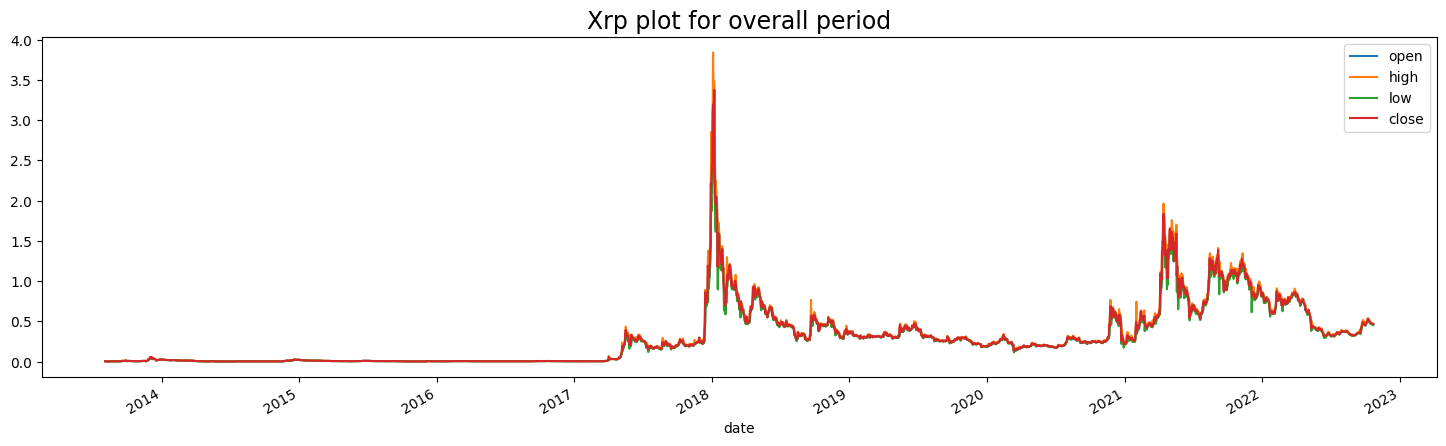

In [34]:
xrp[["open", "high", "low", "close"]].plot(figsize=(18, 5))
plt.title("Xrp plot for overall period", fontsize=17)

In [35]:
# top 5 dates with highest price for Xrp
xrp.sort_values(by="high", ascending=False).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2018-01-04,3.11734,3.84194,3.11734,3.19663,8.103660e+09,1.238347e+11,2018-01-04T23:59:59.999Z,XRP
2018-01-05,3.30081,3.56468,2.82561,3.04871,6.288500e+09,1.181044e+11,2018-01-05T23:59:59.999Z,XRP
2018-01-07,3.09296,3.48725,3.08382,3.37781,2.395150e+09,1.308535e+11,2018-01-07T23:59:59.999Z,XRP
2018-01-08,3.36357,3.36357,2.06552,2.45621,3.315260e+09,9.515147e+10,2018-01-08T23:59:59.999Z,XRP
2018-01-03,2.46410,3.27938,2.44315,3.10537,6.635880e+09,1.202994e+11,2018-01-03T23:59:59.999Z,XRP


In [36]:
# top 5 dates with lowest price for Xrp
xrp.sort_values(by="low", ascending=True).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2014-07-07,0.002809,0.003082,0.002802,0.003082,191510.0,2.409630e+07,2014-07-07T23:59:59.999Z,XRP
2014-07-06,0.003134,0.003169,0.002804,0.002810,148862.0,2.196991e+07,2014-07-06T23:59:59.999Z,XRP
2013-08-16,0.003082,0.003162,0.002875,0.003134,0.0,2.449751e+07,2013-08-16T23:59:59.999Z,XRP
2014-05-23,0.003963,0.003976,0.003063,0.003315,1174650.0,2.591857e+07,2014-05-23T23:59:59.999Z,XRP
2013-08-15,0.003788,0.003804,0.003067,0.003092,0.0,2.417268e+07,2013-08-15T23:59:59.999Z,XRP


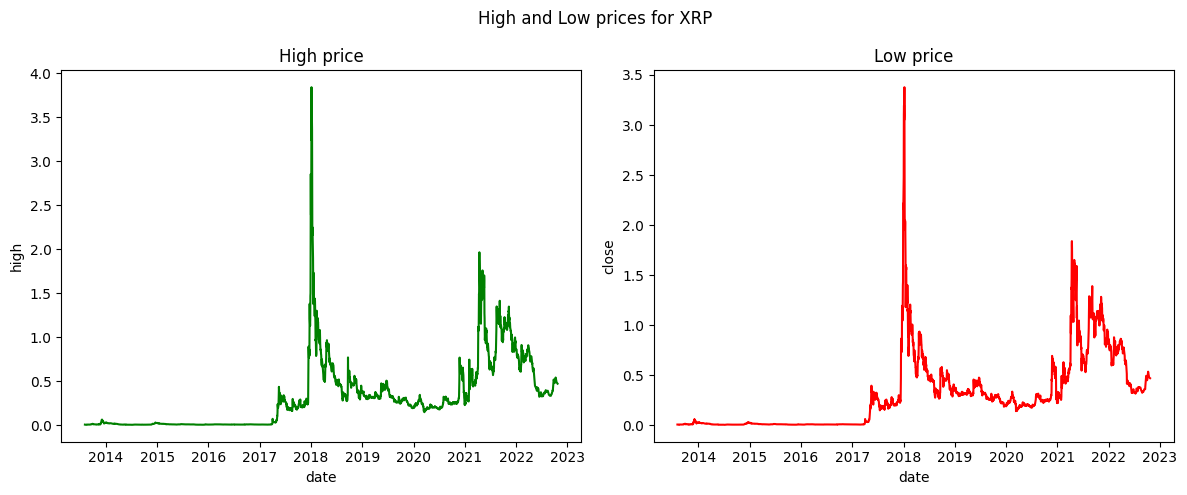

In [37]:
# high and low price per period of time visualization
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
fig.suptitle("High and Low prices for XRP")
sns.lineplot(ax=axes[0], y=xrp["high"], x=xrp.index, color="green")
axes[0].set_title("High price")
sns.lineplot(ax=axes[1], y=xrp["close"], x=xrp.index, color="red")
axes[1].set_title("Low price")
plt.tight_layout()
plt.show()

#### usdt(tether)

In [38]:
usdt = new_data.loc[new_data["crypto_name"] == "Tether"].copy()

In [39]:
usdt = usdt.set_index("date")
usdt.index = pd.to_datetime(usdt.index)
usdt.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2015-02-25,1.210160,1.215490,1.209580,1.211100,5.981930,304712.7600,2015-02-25T23:59:59.999Z,Tether
2015-02-26,1.210420,1.212320,1.194710,1.205740,5.955460,303364.1840,2015-02-26T23:59:59.999Z,Tether
2015-03-02,0.571249,0.607890,0.568314,0.606502,3.032500,152595.9032,2015-03-02T23:59:59.999Z,Tether
2015-03-03,0.605129,0.606229,0.604416,0.606229,3.031130,152527.2164,2015-03-03T23:59:59.999Z,Tether
2015-03-06,1.000000,1.000000,1.000000,1.000000,92.647202,251600.0000,2015-03-06T23:59:59.999Z,Tether


### VISUALS

Text(0.5, 1.0, 'Usdt plot for overall period')

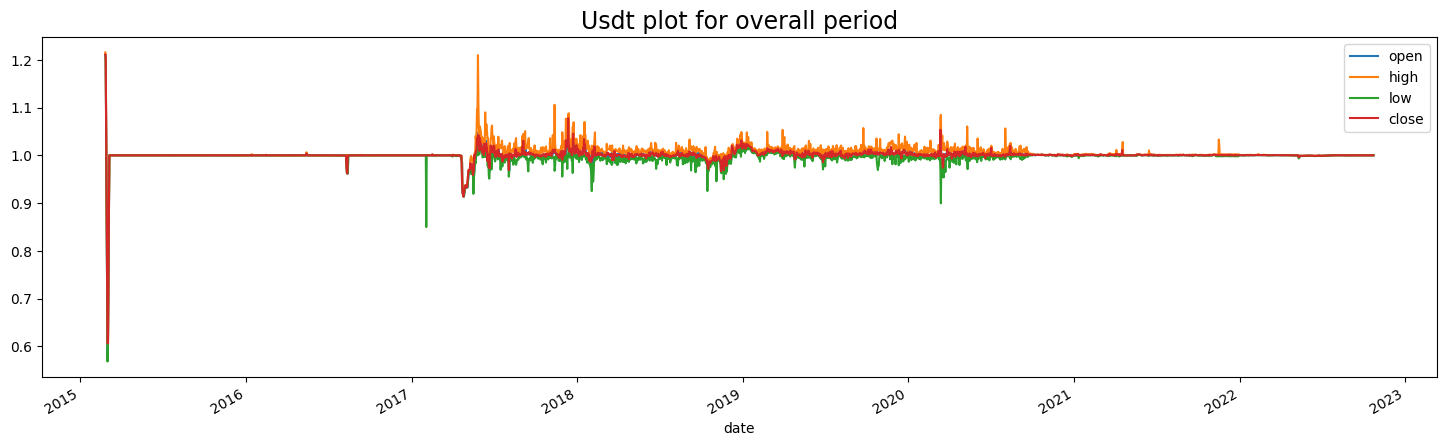

In [40]:
usdt[["open", "high", "low", "close"]].plot(figsize=(18, 5))
plt.title("Usdt plot for overall period", fontsize=17)

In [41]:
# top 5 dates with highest price for usdt
usdt.sort_values(by="high", ascending=False).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2015-02-25,1.21016,1.21549,1.209580,1.21110,5.981930e+00,3.047128e+05,2015-02-25T23:59:59.999Z,Tether
2015-02-26,1.21042,1.21232,1.194710,1.20574,5.955460e+00,3.033642e+05,2015-02-26T23:59:59.999Z,Tether
2017-05-27,1.04757,1.20981,1.000440,1.02369,1.866830e+08,1.074810e+08,2017-05-27T23:59:59.999Z,Tether
2017-05-28,1.02226,1.10998,1.019260,1.04244,1.100260e+08,1.094496e+08,2017-05-28T23:59:59.999Z,Tether
2017-11-12,1.00602,1.10591,0.967601,1.01247,1.466060e+09,6.014696e+08,2017-11-12T23:59:59.999Z,Tether


In [42]:
# top 5 dates with lowest price for usdt
usdt.sort_values(by="low", ascending=True).head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name
date,,,,,,,,
2015-03-02,0.571249,0.607890,0.568314,0.606502,3.032500e+00,1.525959e+05,2015-03-02T23:59:59.999Z,Tether
2015-03-03,0.605129,0.606229,0.604416,0.606229,3.031130e+00,1.525272e+05,2015-03-03T23:59:59.999Z,Tether
2017-02-02,0.999999,0.999999,0.849809,0.999994,3.494060e+06,2.495144e+07,2017-02-02T23:59:59.999Z,Tether
2020-03-13,1.039605,1.084802,0.899490,0.999629,9.931533e+10,4.640646e+09,2020-03-13T23:59:59.999Z,Tether
2017-04-26,0.913539,0.921050,0.913539,0.921050,1.877240e+07,5.727776e+07,2017-04-26T23:59:59.999Z,Tether


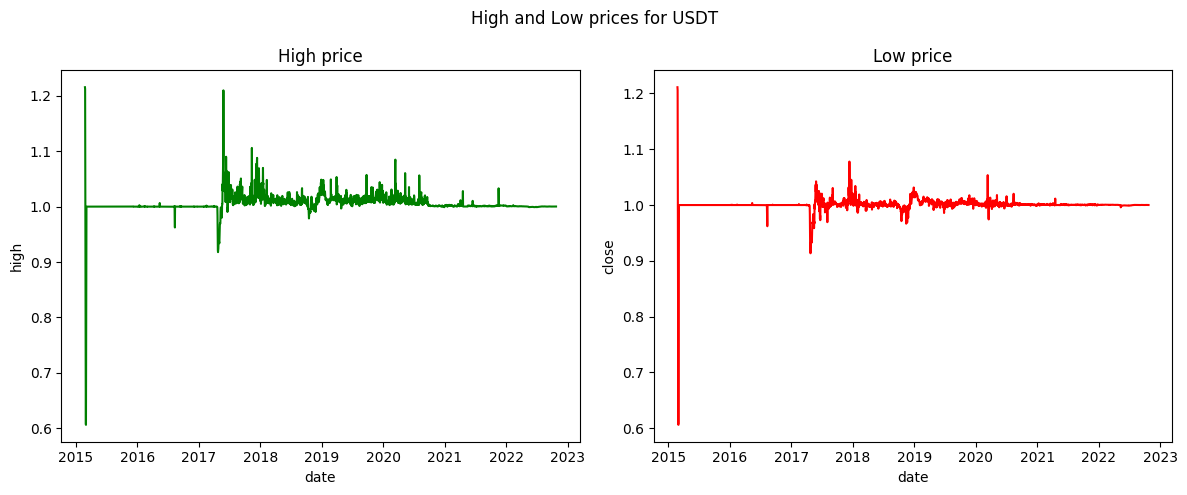

In [43]:
# high and low price per period of time visualization
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 5))
fig.suptitle("High and Low prices for USDT")
sns.lineplot(ax=axes[0], y=usdt["high"], x=usdt.index, color="green")
axes[0].set_title("High price")
sns.lineplot(ax=axes[1], y=usdt["close"], x=usdt.index, color="red")
axes[1].set_title("Low price")
plt.tight_layout()
plt.show()

# DISTRIBUTION OF DATA FOR EACH COIN

## BITCOIN

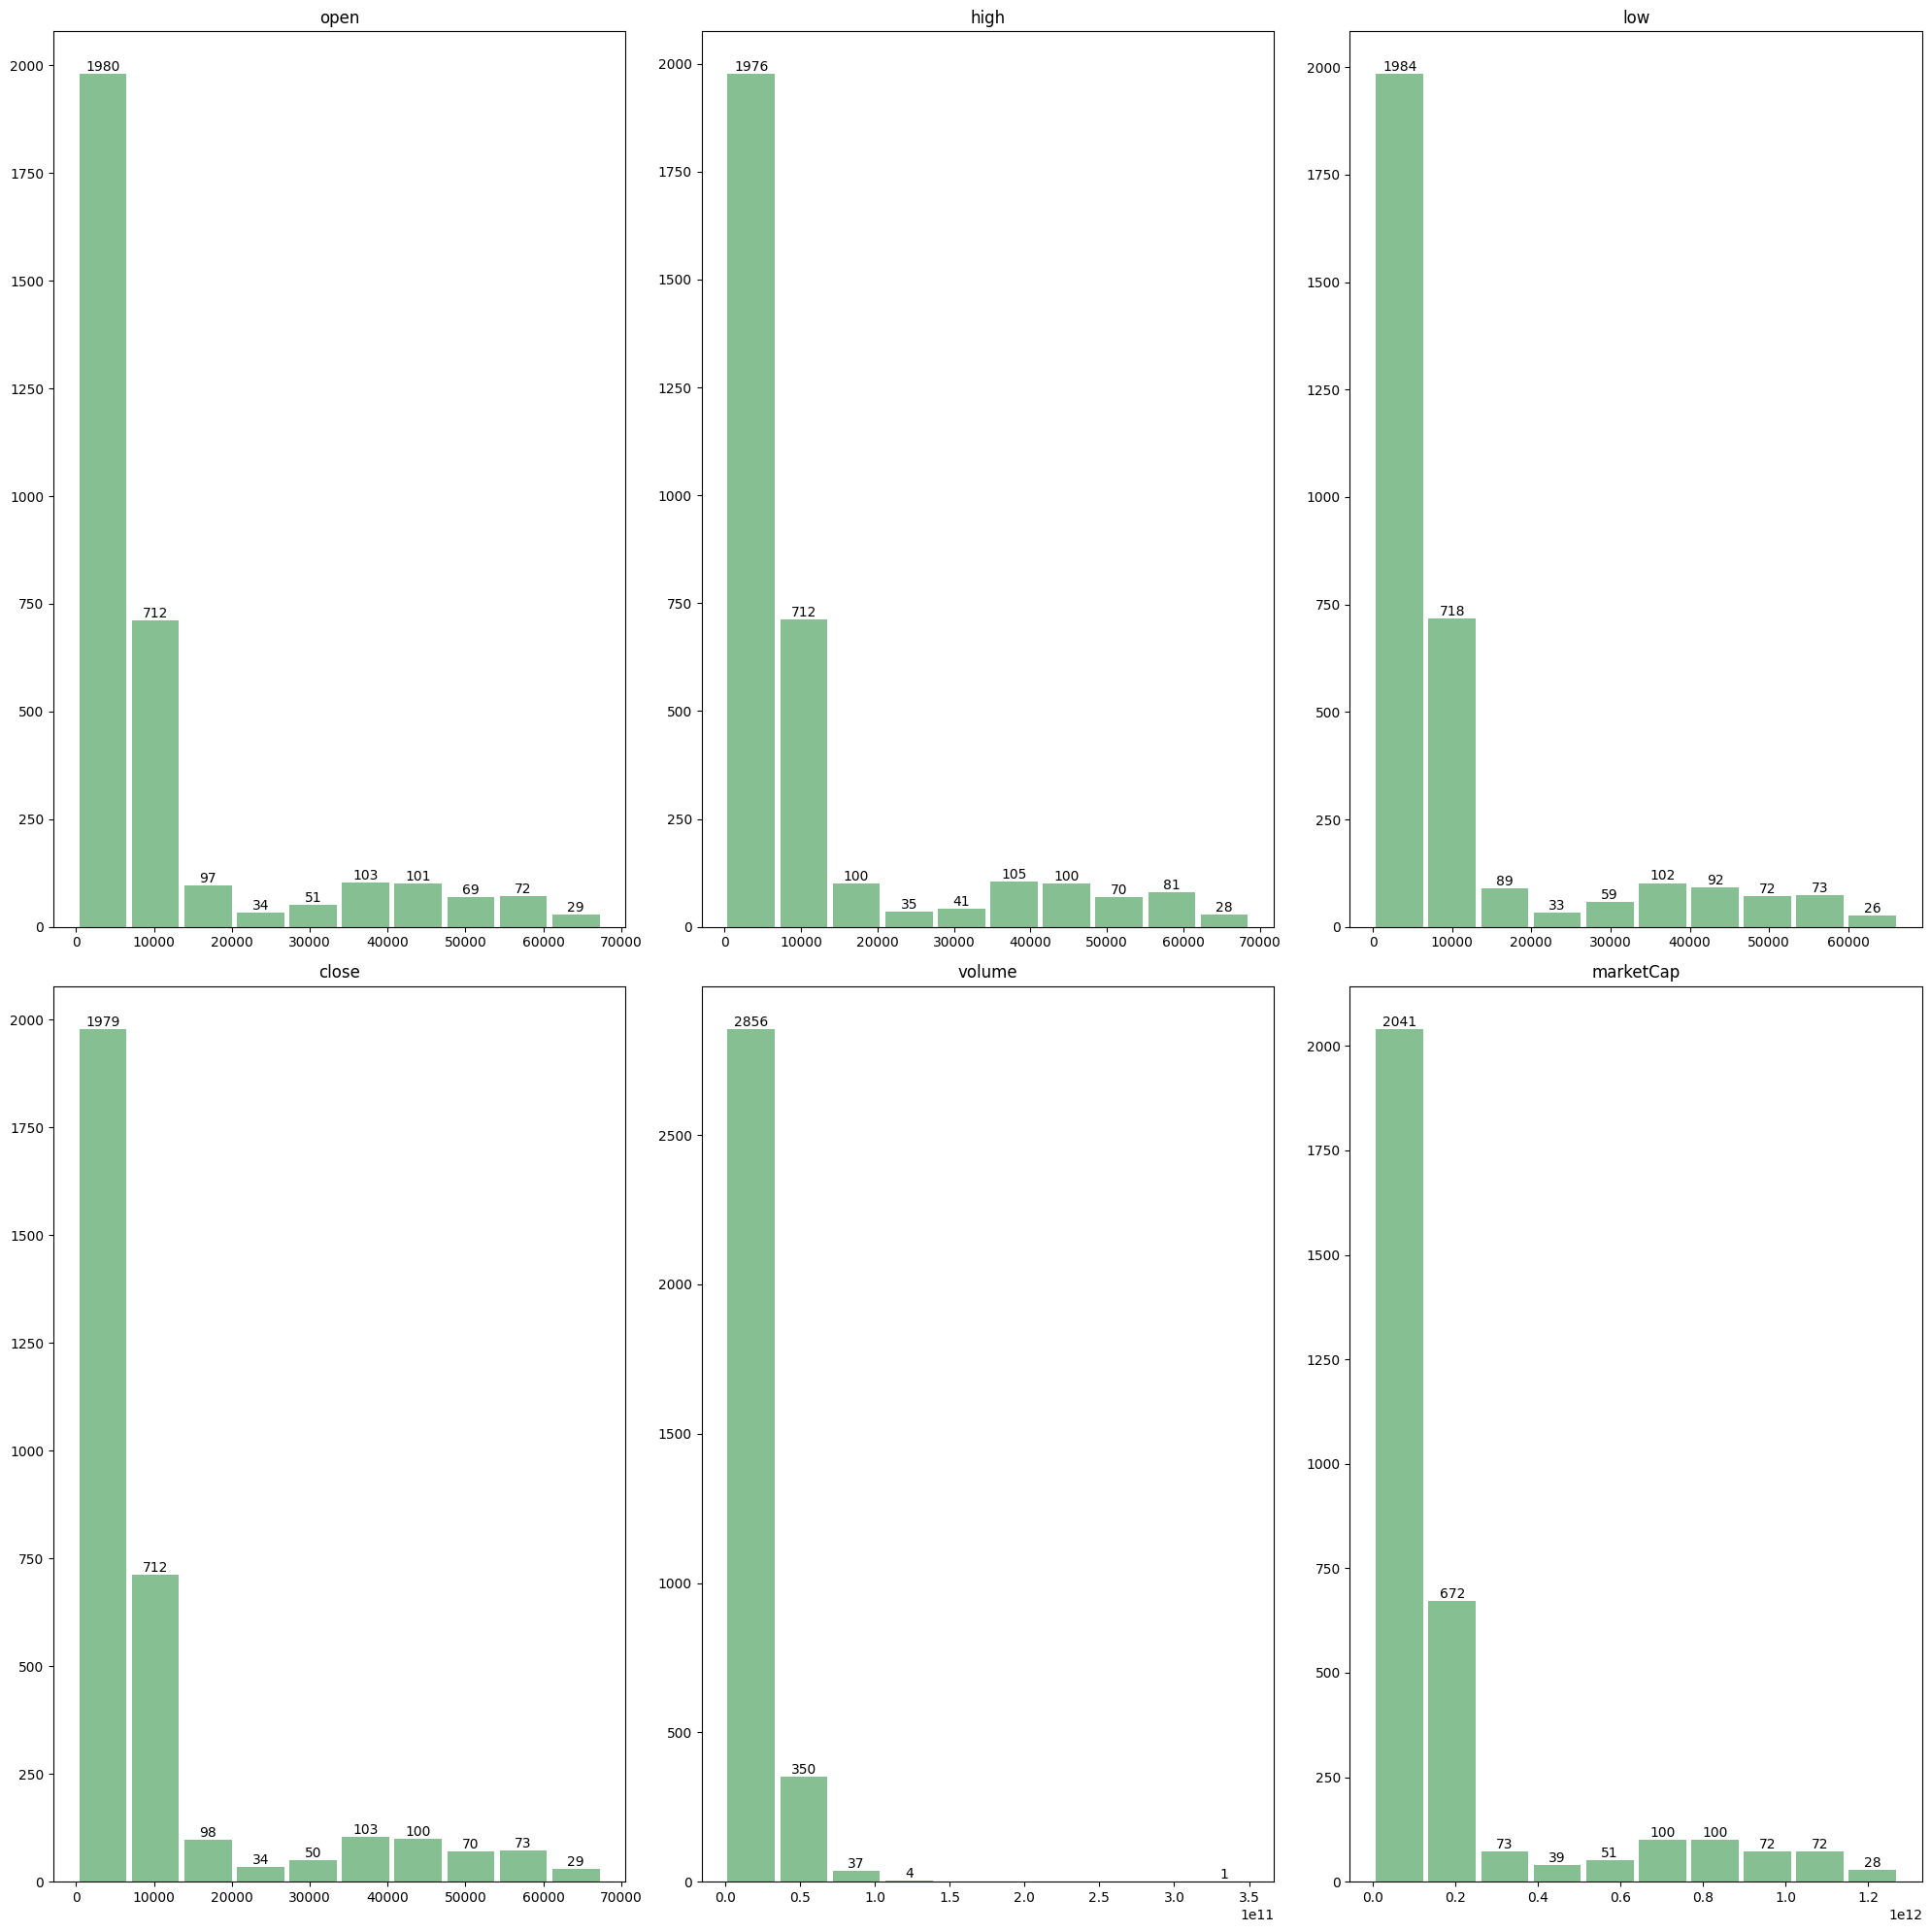

In [44]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))
axs = axs.flatten()

for ax, column in zip(axs, btc.columns):
    ax.hist(btc[column], bins=10, color="#86bf91", zorder=2, rwidth=0.9)
    ax.set_title(column)
    ax.grid(False)
    
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, f"{int(height)}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

## DOGE

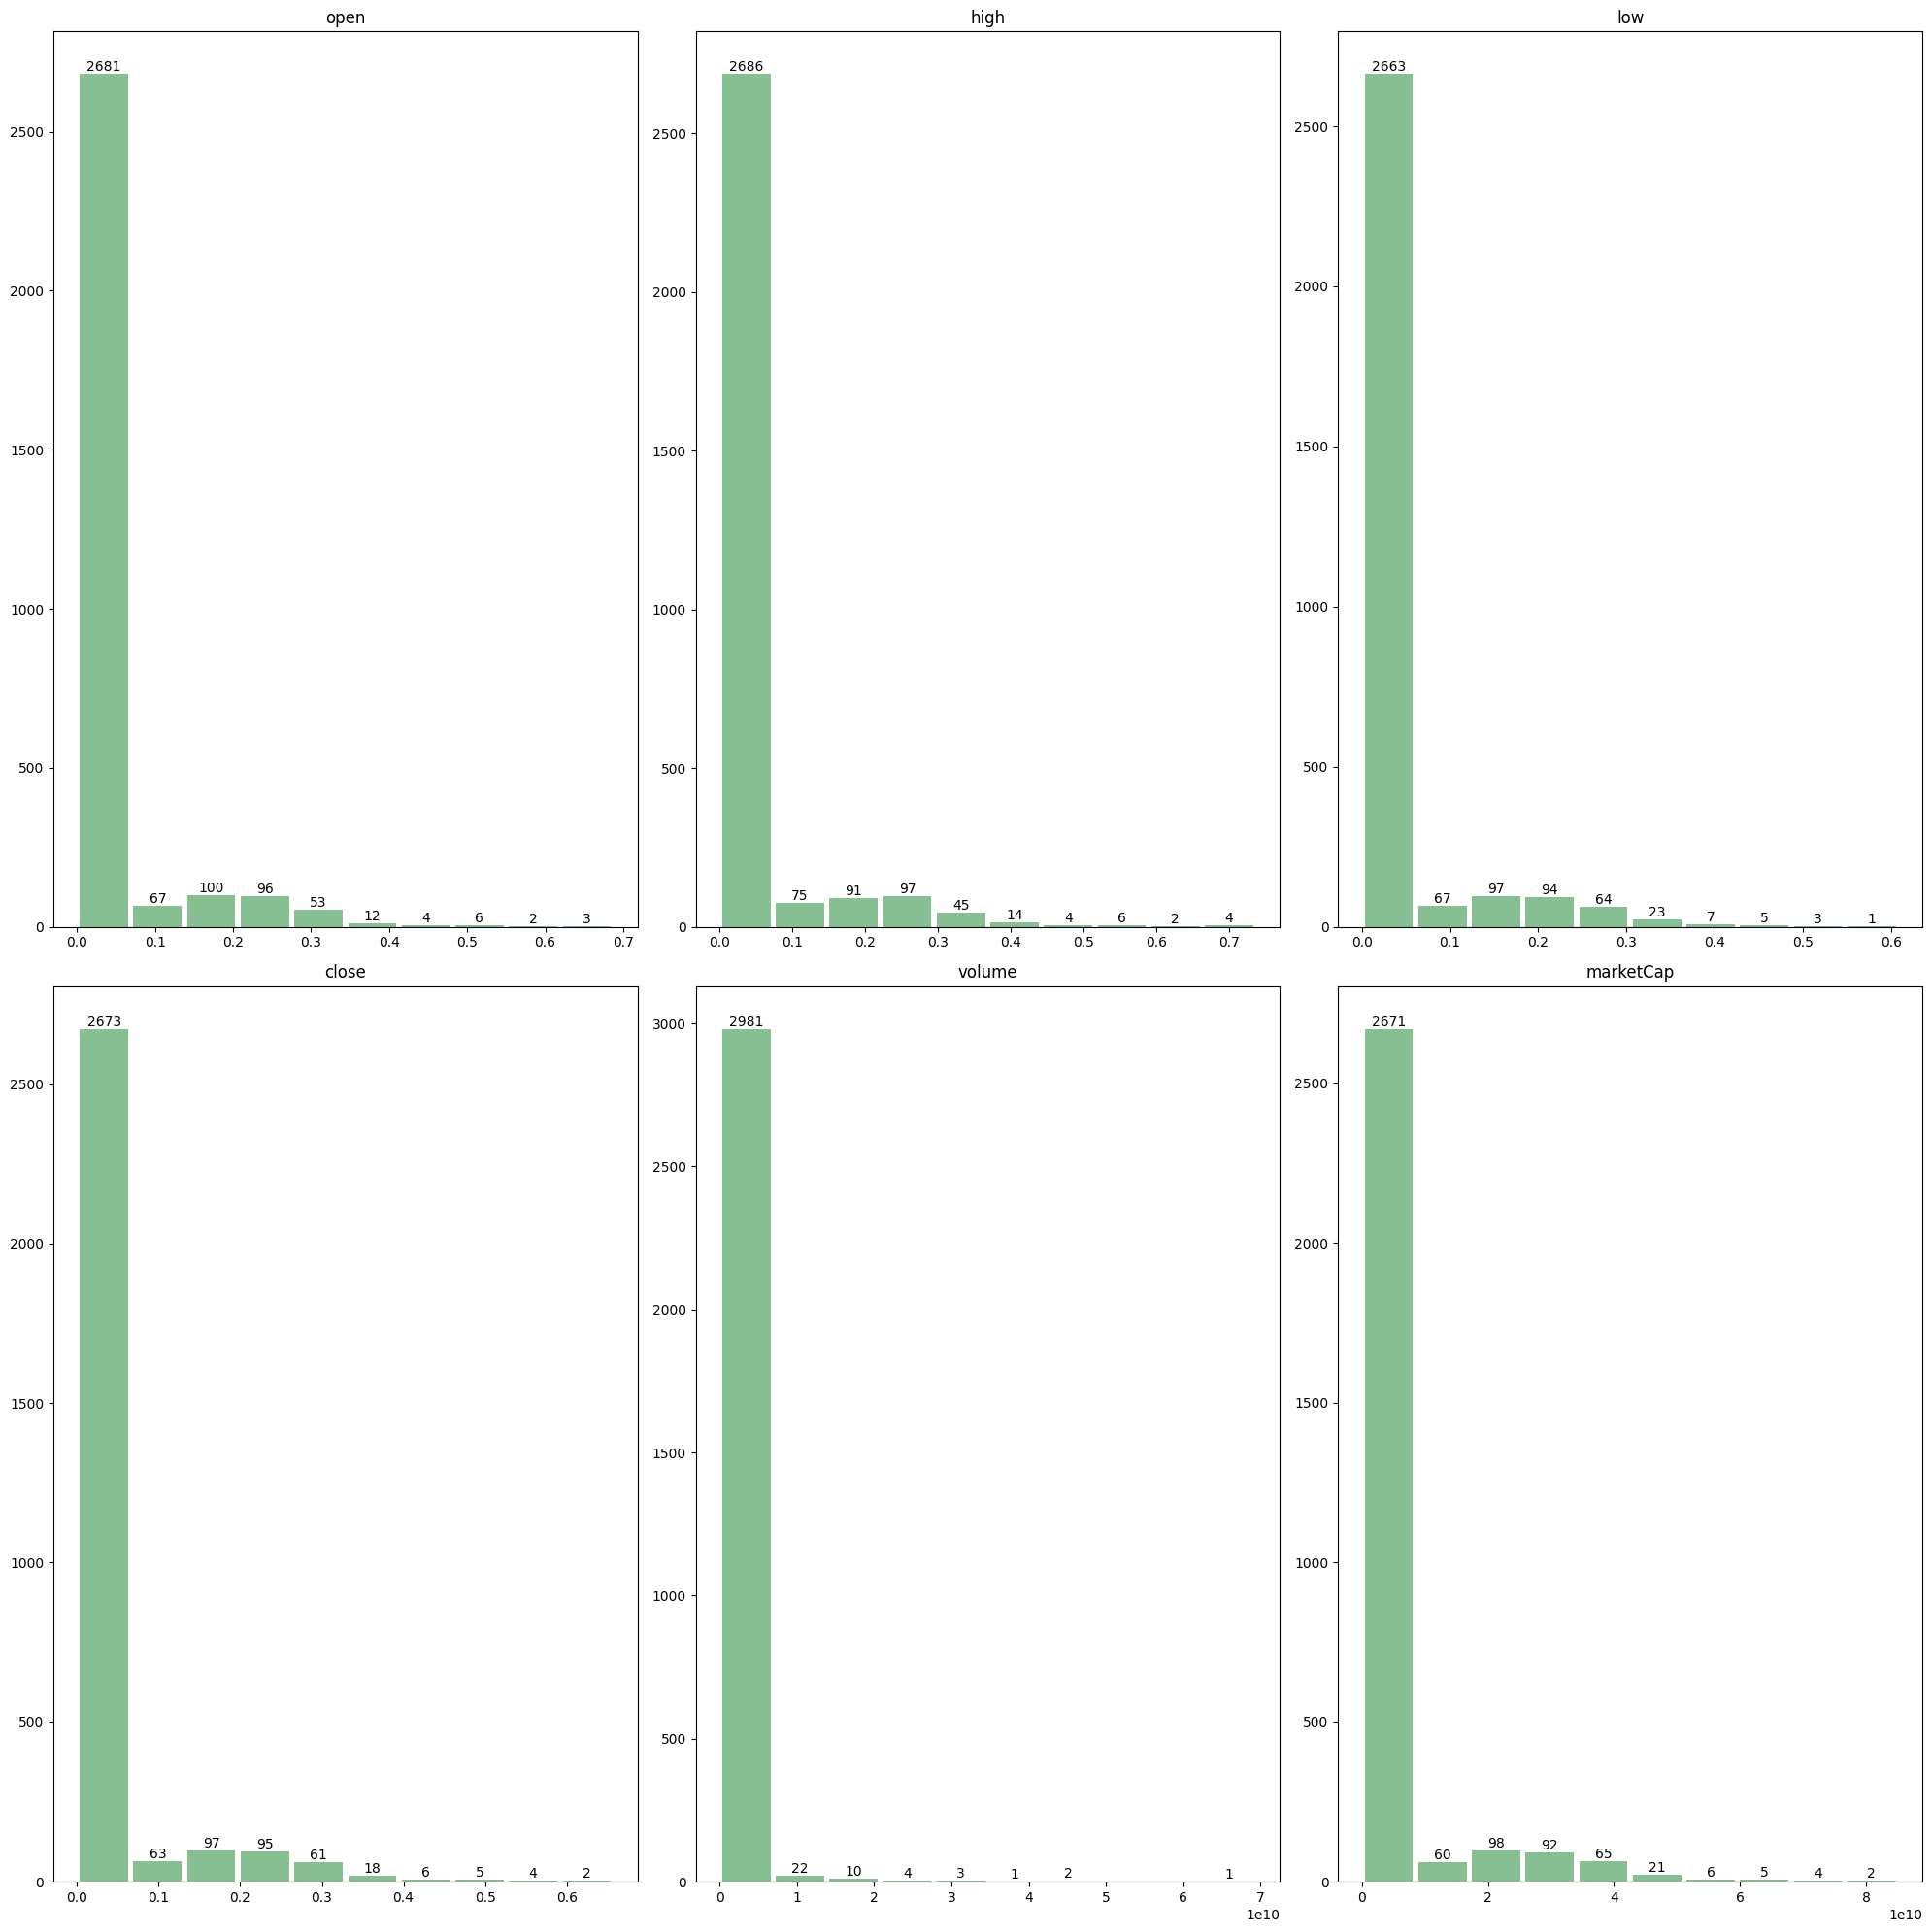

In [45]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))
axs = axs.flatten()

for ax, column in zip(axs, doge.columns):
    ax.hist(doge[column], bins=10, color="#86bf91", zorder=2, rwidth=0.9)
    ax.set_title(column)
    ax.grid(False)
    
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, f"{int(height)}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

## XRP

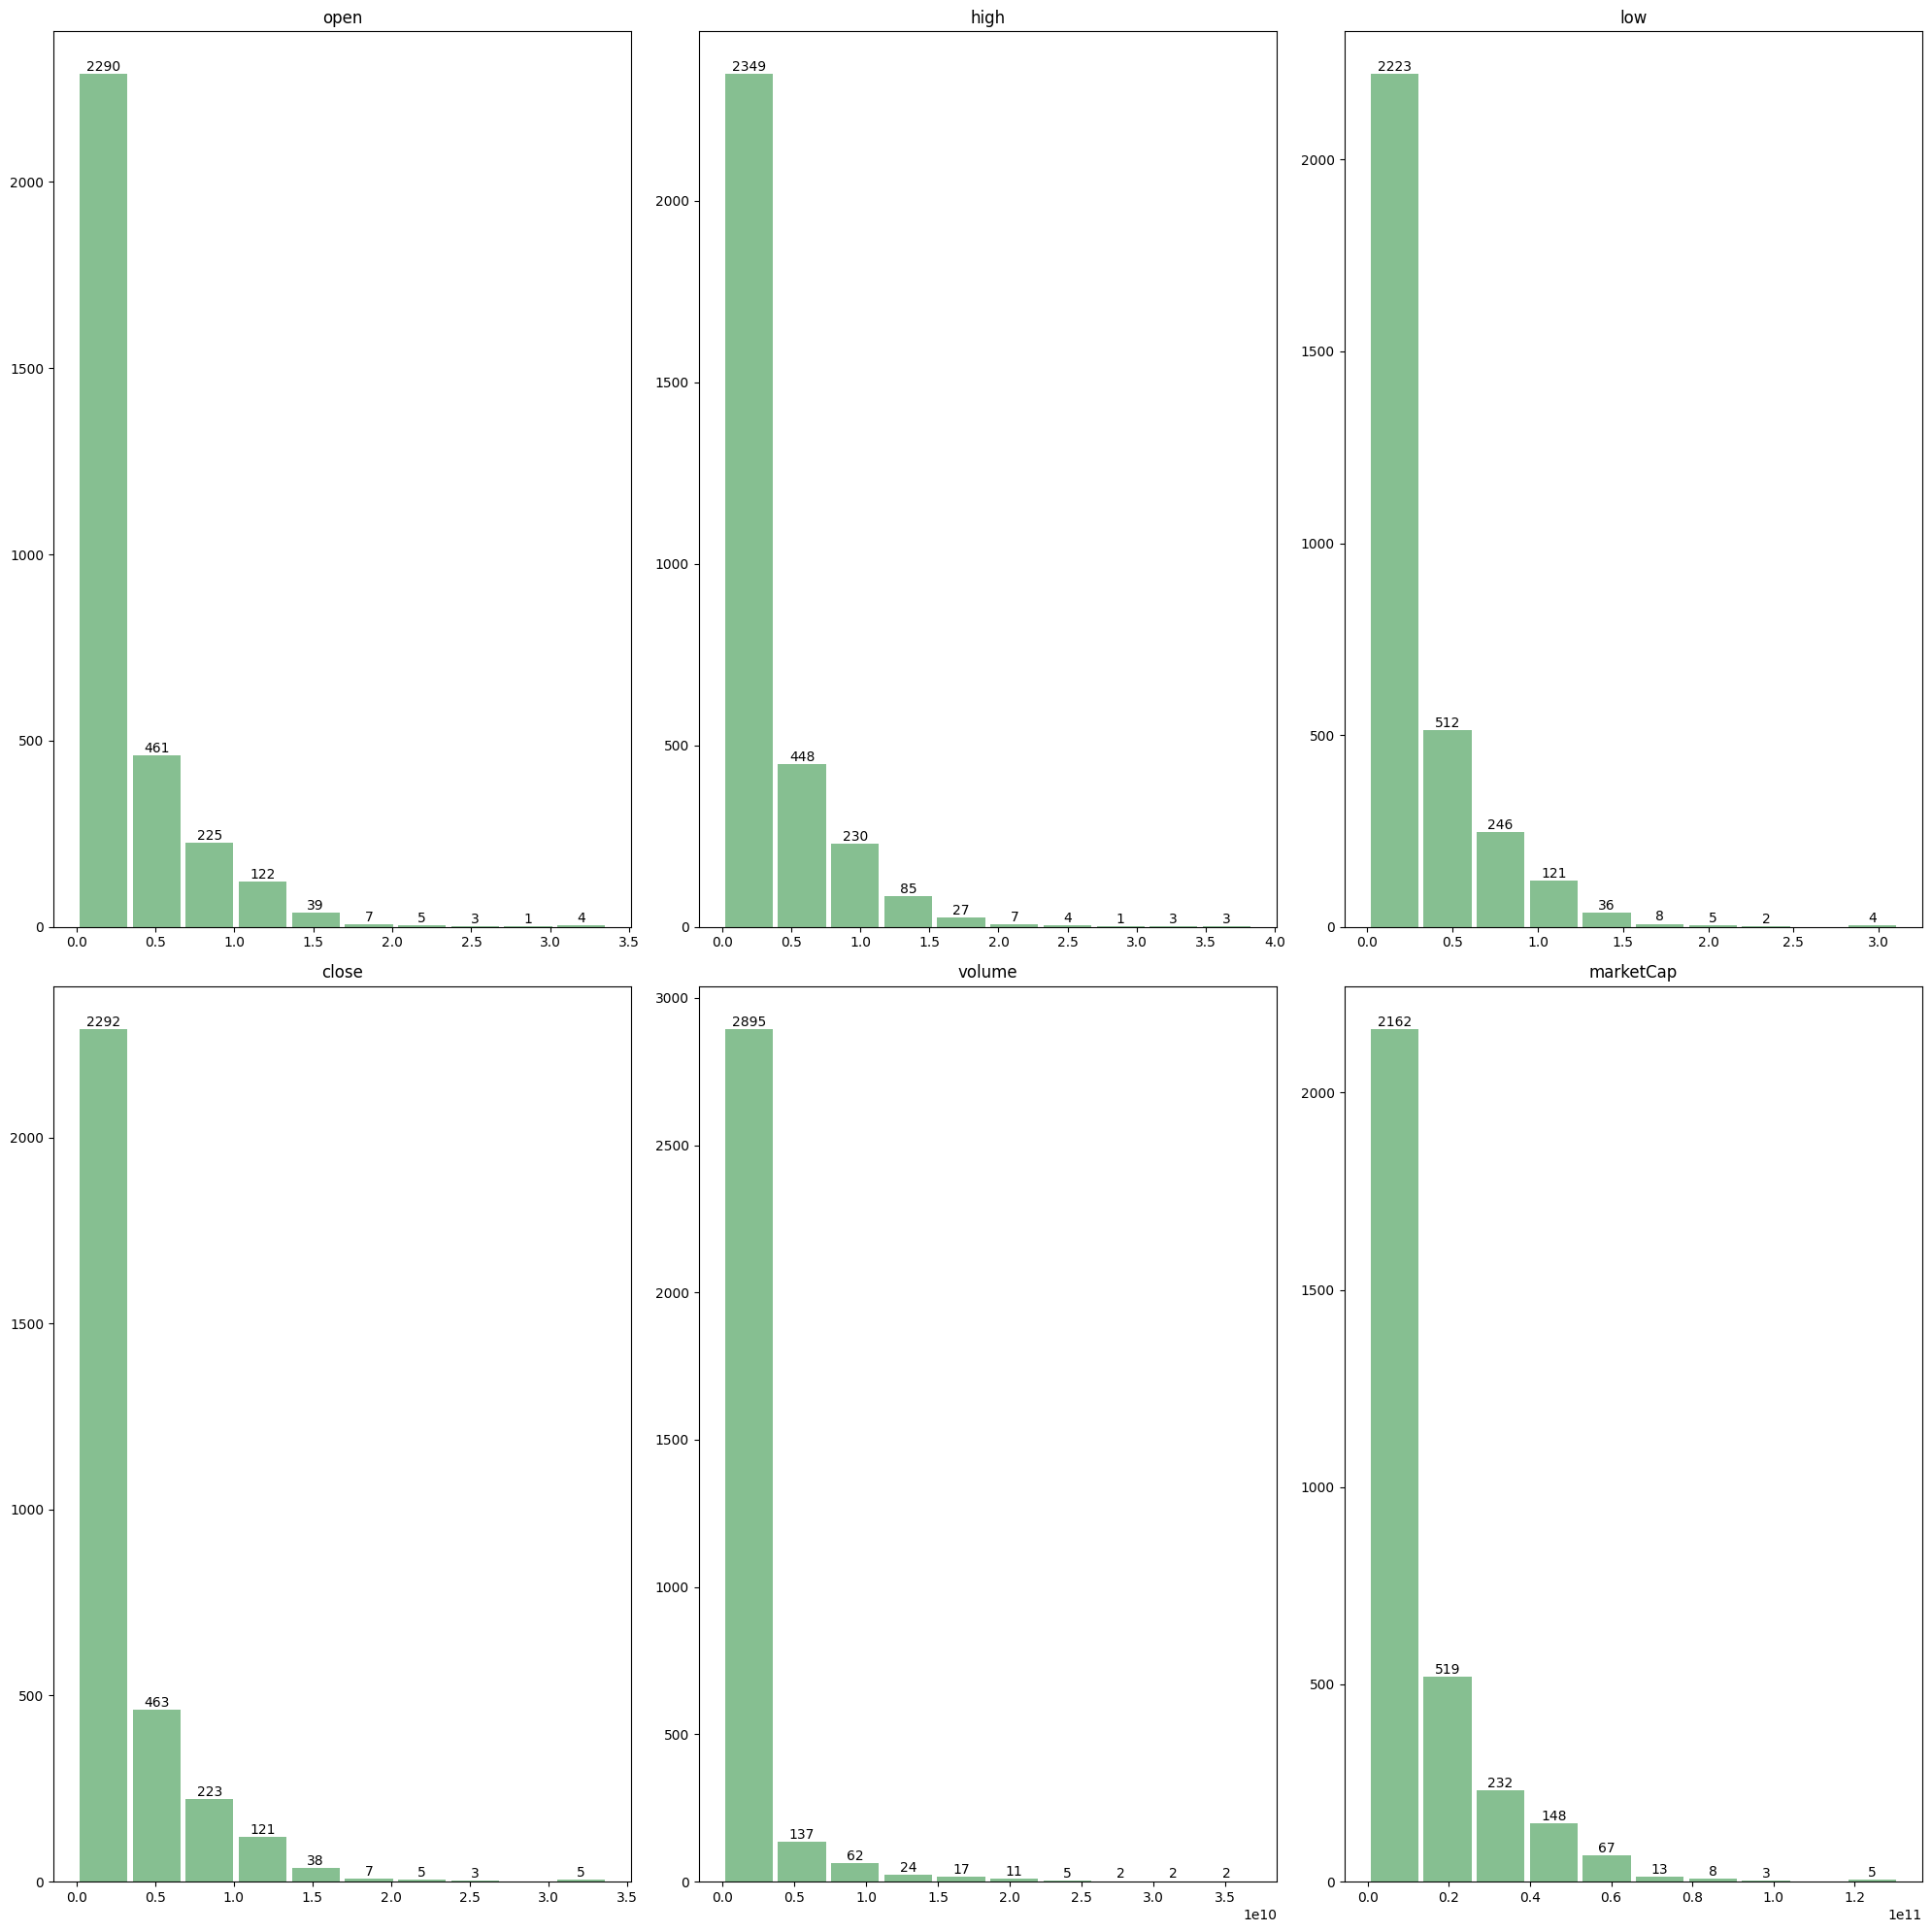

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))
axs = axs.flatten()

for ax, column in zip(axs, xrp.columns):
    ax.hist(xrp[column], bins=10, color="#86bf91", zorder=2, rwidth=0.9)
    ax.set_title(column)
    ax.grid(False)
    
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, f"{int(height)}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

## USDT

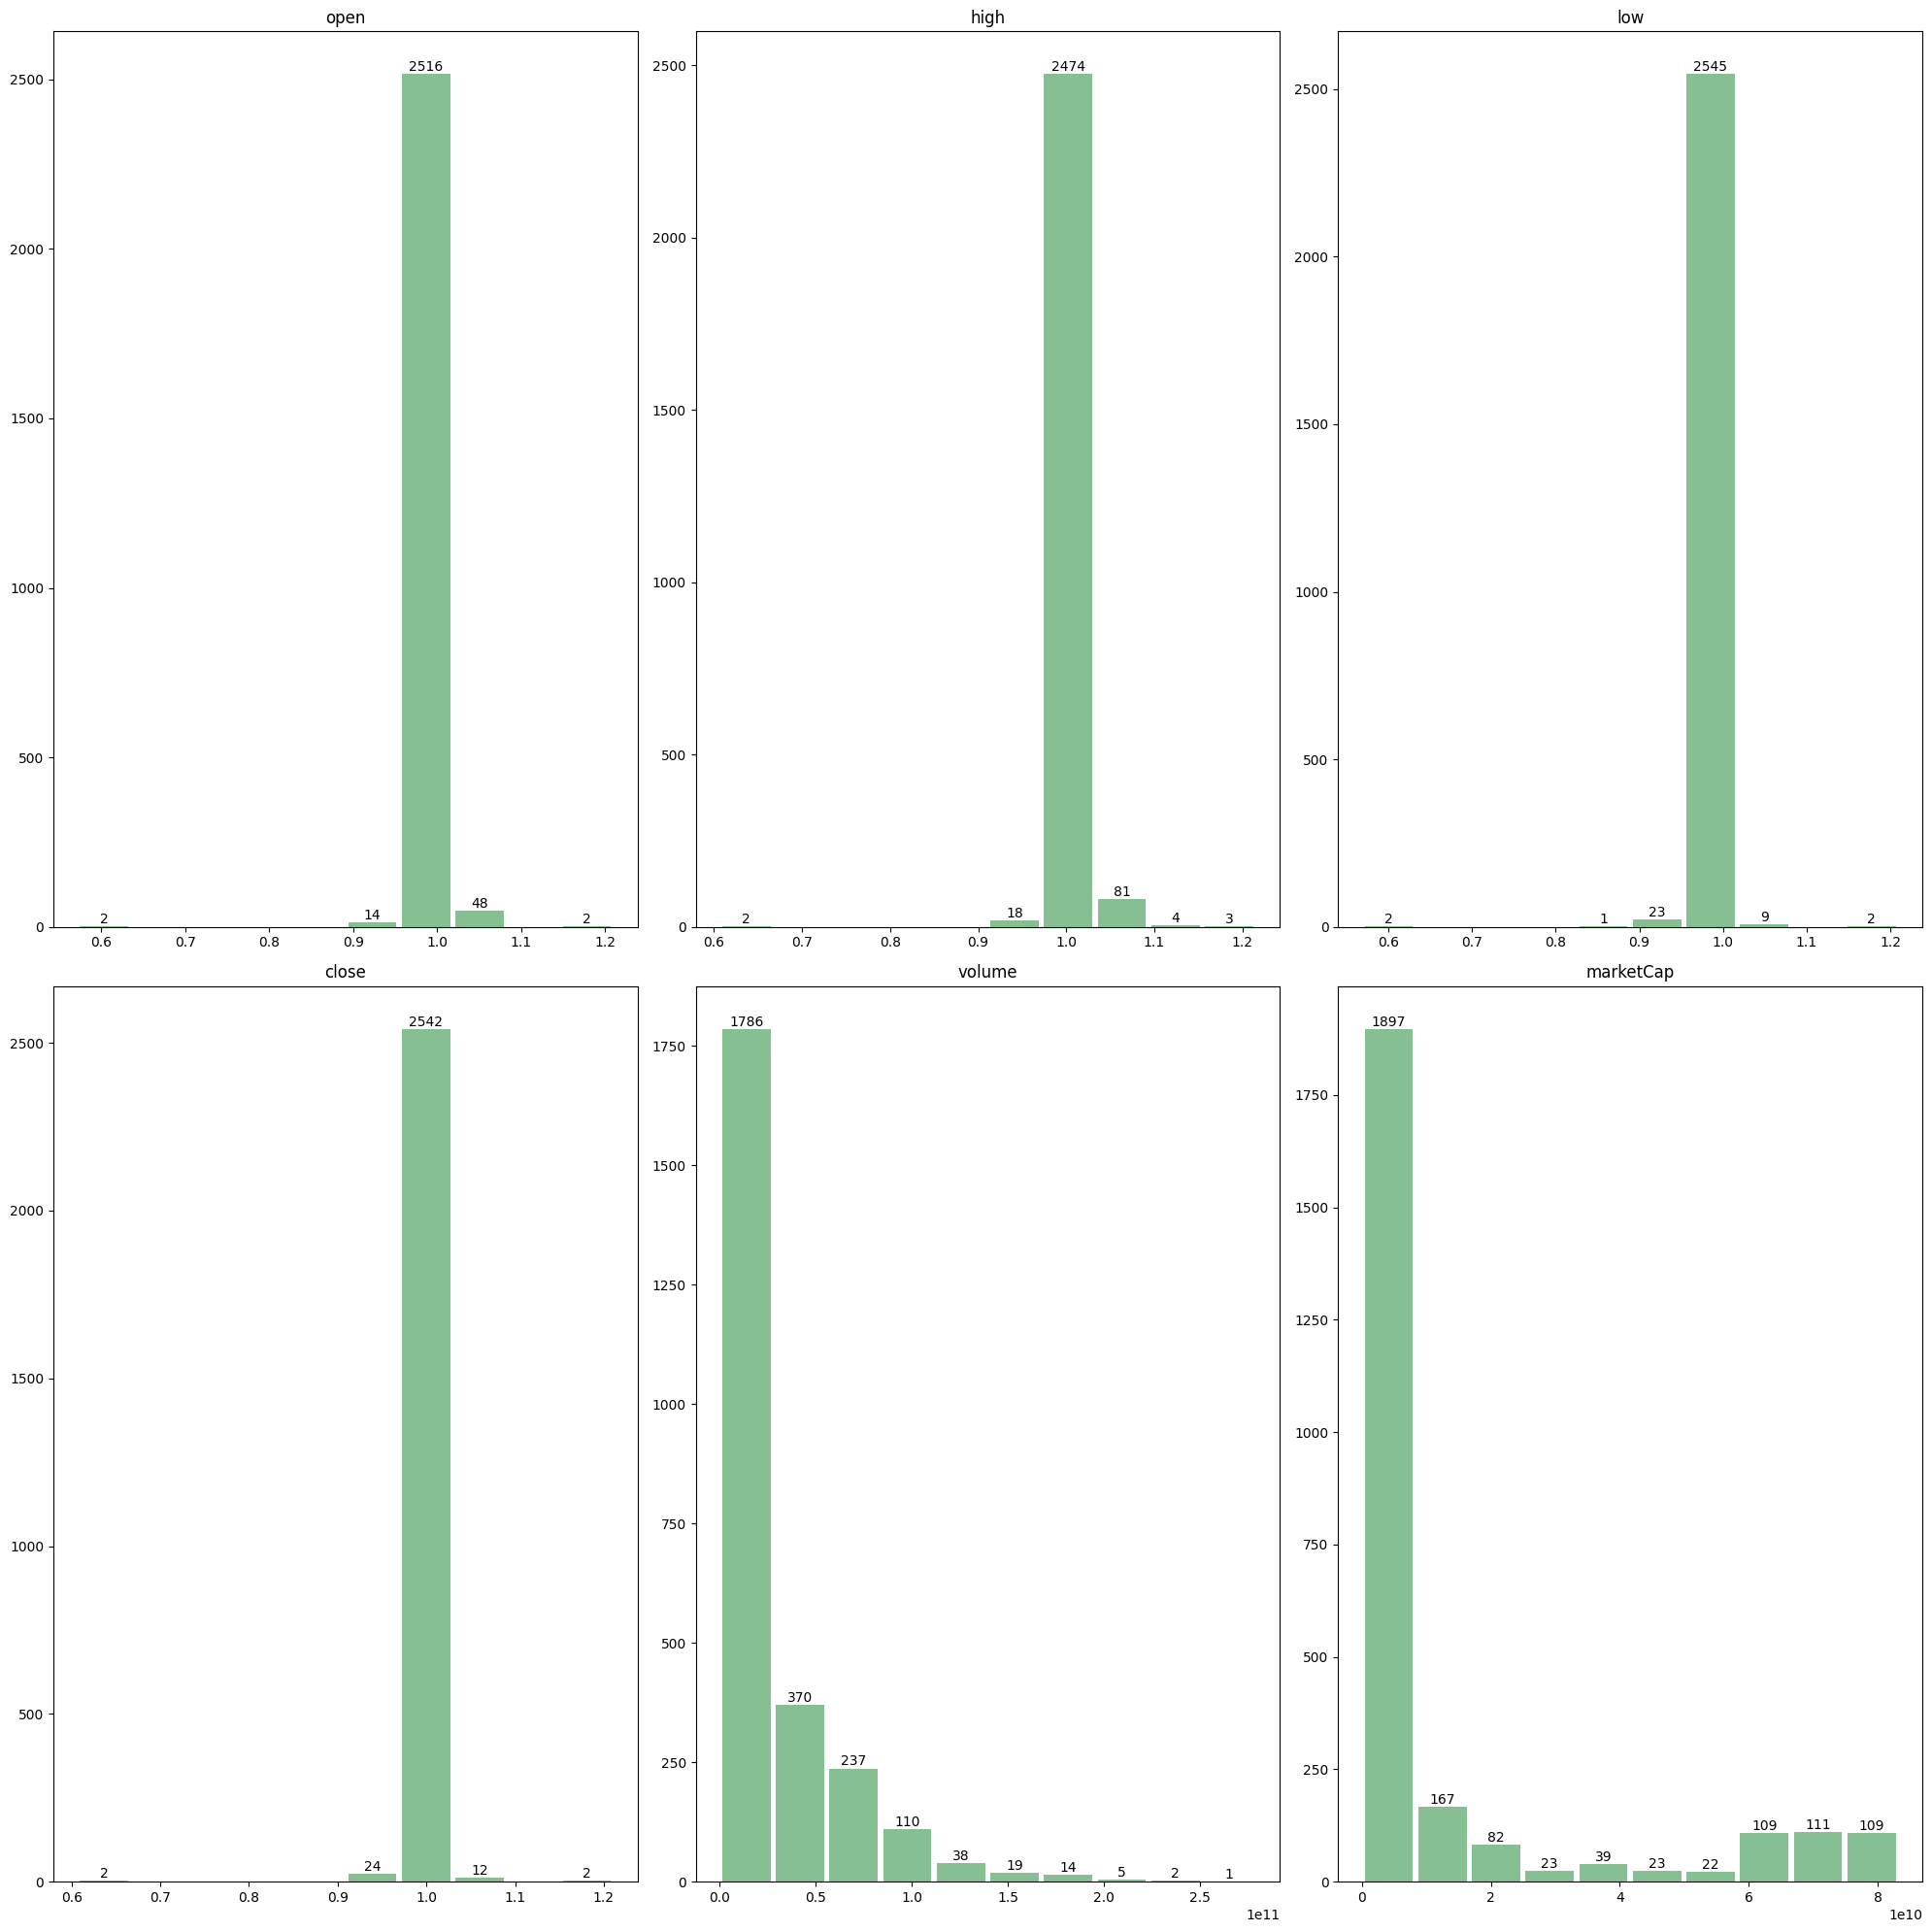

In [47]:
fig, axs = plt.subplots(2, 3, figsize=(20,20))
axs = axs.flatten()

for ax, column in zip(axs, usdt.columns):
    ax.hist(usdt[column], bins=10, color="#86bf91", zorder=2, rwidth=0.9)
    ax.set_title(column)
    ax.grid(False)
    
    for rect in ax.patches:
        height = rect.get_height()
        if height > 0:
            ax.text(rect.get_x() + rect.get_width() / 2, height + 0.1, f"{int(height)}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

## CORRELATION MATRIX FOR THE FOUR COINS

#### btc

In [48]:
correlation_1 = btc.corr()

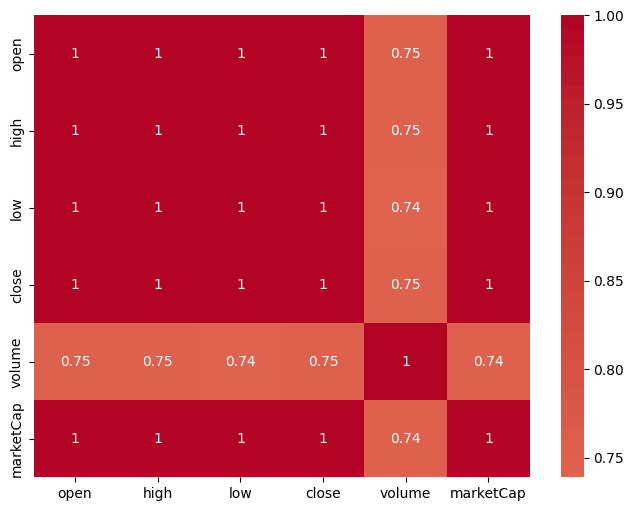

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_1, annot=True, cmap = "coolwarm", center = 0)
plt.show()

#### doge

In [50]:
correlation_2 = doge.corr()

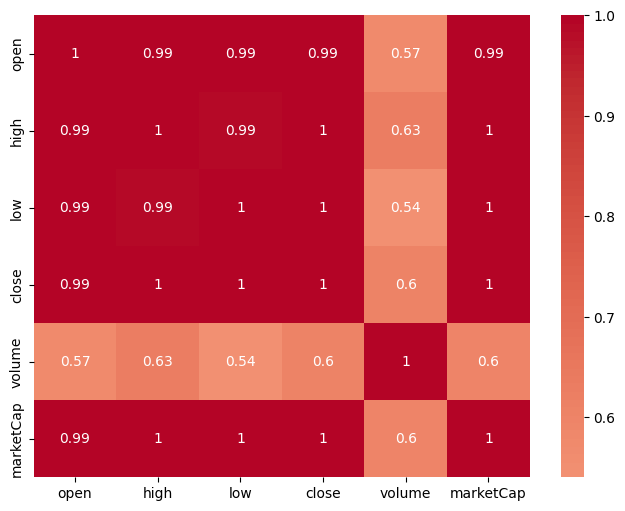

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_2, annot=True, cmap = "coolwarm", center = 0)
plt.show()

#### xrp

In [52]:
correlation_3 = xrp.corr()

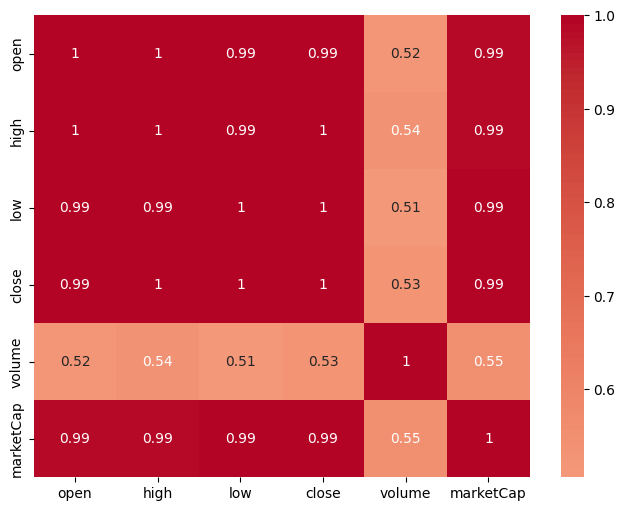

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_3, annot=True, cmap = "coolwarm", center = 0)
plt.show()

#### usdt

In [54]:
correlation_4 = usdt.corr()

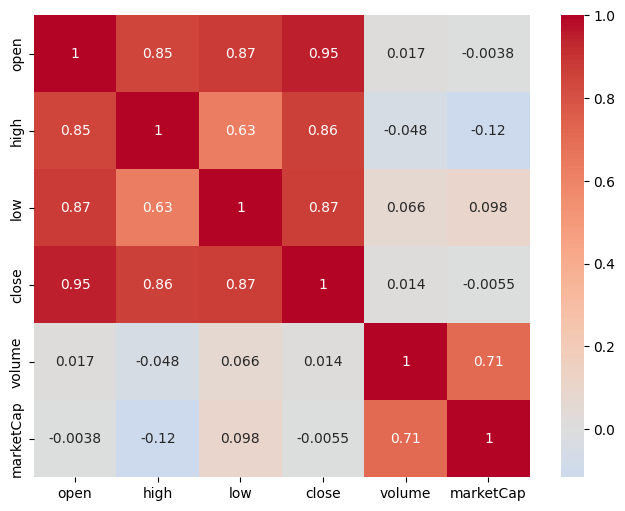

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_4, annot=True, cmap = "coolwarm", center = 0)
plt.show()

## DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

### PROCESSING EACH OF THE COINS FOR MODEL BUILDING

In [56]:
# dropping timestamp and date columns
btc.drop(["timestamp"], axis=1, inplace=True)
doge.drop(["timestamp"], axis=1, inplace=True)
xrp.drop(["timestamp"], axis=1, inplace=True)
usdt.drop(["timestamp"], axis=1, inplace=True)

In [57]:
encoder = LabelEncoder()

In [58]:
btc["crypto_name"] = encoder.fit_transform(btc["crypto_name"])
doge["crypto_name"] = encoder.fit_transform(doge["crypto_name"])
xrp["crypto_name"] = encoder.fit_transform(xrp["crypto_name"])
usdt["crypto_name"] = encoder.fit_transform(usdt["crypto_name"])

### GETTING THE REGPLOT FOR THE COINS

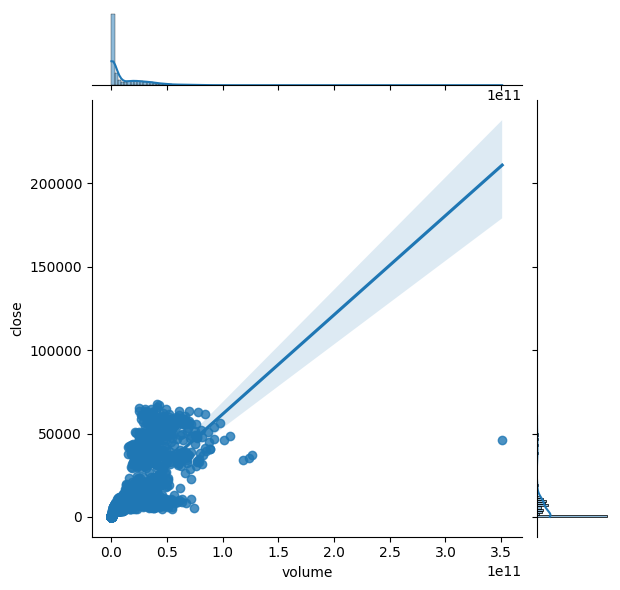

In [59]:
sns.jointplot(x="volume", y="close", data=btc, kind="reg")

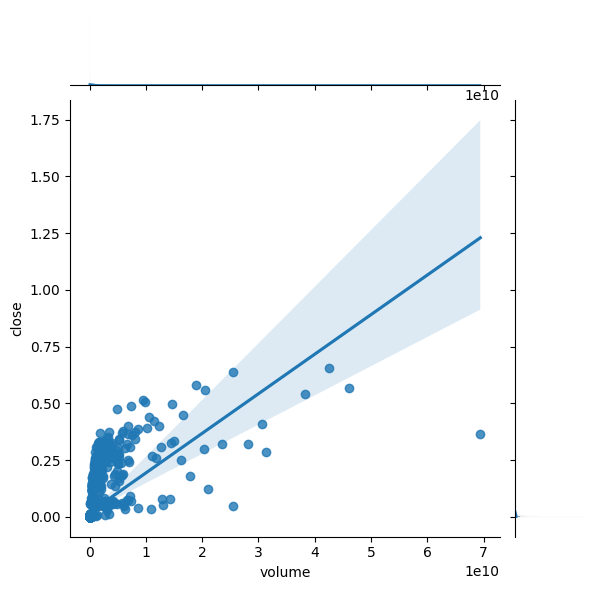

In [60]:
sns.jointplot(x="volume", y="close", data=doge, kind="reg")

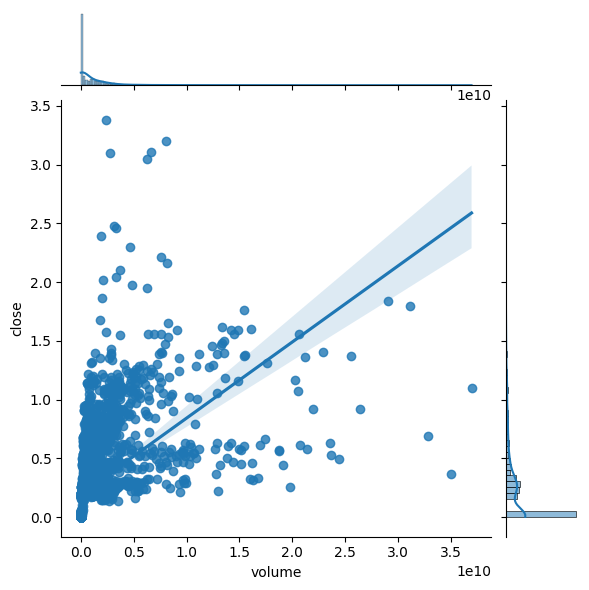

In [61]:
sns.jointplot(x="volume", y="close", data=xrp, kind="reg")

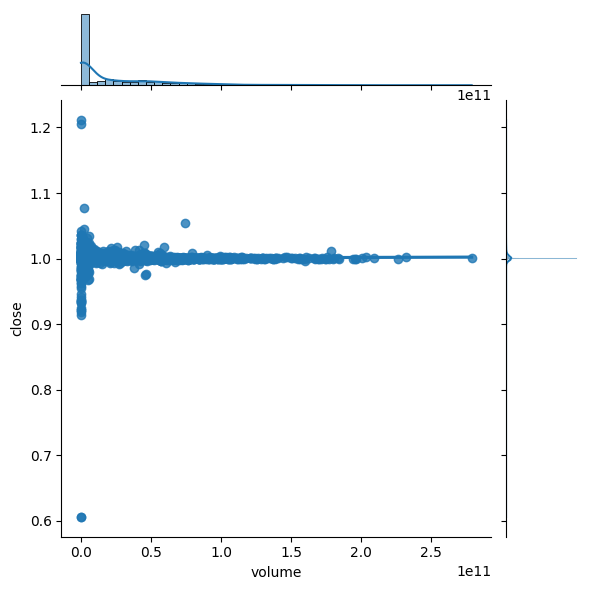

In [62]:
sns.jointplot(x="volume", y="close", data=usdt, kind="reg")

# MACHINE LEARNING PREDICTIVE MODELS

## BTC

In [63]:
# splitting the data into dependent and independent variables
X = btc.drop("close", axis = 1) #independent columns
y = btc["close"] #target

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [65]:
scaler = StandardScaler()

In [66]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### RANDOM FOREST

In [67]:
model_1 = RandomForestRegressor(n_estimators=300, random_state=46, max_depth=10)

In [68]:
model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=46)

In [69]:
predict = model_1.predict(X_test)

In [70]:
round(mean_absolute_error(y_test, predict), 4)

82.9847

In [71]:
round(mean_squared_error(y_test, predict), 4)

32674.4789

In [72]:
round(r2_score(y_test, predict), 4)

0.9999

In [73]:
errors = abs(predict - y_test)

In [74]:
mape = 100 * (errors / y_test)

In [75]:
accuracy = 100 - np.mean(mape)

In [76]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 98.78 %.


In [77]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=btc.index[-1], periods=len(predict), freq="D"))

In [78]:
predictions.to_csv("Predicted_data1.csv")

#### COLLECTING ONE YEAR PREDICTION

In [79]:
oneyear_df = pd.DataFrame(predictions[:252])

In [80]:
oneyear_df.to_csv("one_year_pred1.csv")

#### LINEAR REGRESSION

In [81]:
model_2 = LinearRegression()

In [82]:
model_2.fit(X_train, y_train)

LinearRegression()

In [83]:
predict = model_2.predict(X_test)

In [84]:
round(mean_absolute_error(y_test, predict), 4)

133.3762

In [85]:
round(mean_squared_error(y_test, predict), 4)

46109.0972

In [86]:
round(r2_score(y_test, predict), 4)

0.9998

In [87]:
errors = abs(predict - y_test)

In [88]:
mape = 100 * (errors / y_test)

In [89]:
accuracy = 100 - np.mean(mape)

In [90]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 87.06 %.


In [91]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=btc.index[-1], periods=len(predict), freq="D"))

In [92]:
predictions.to_csv("Predicted_data2.csv")

#### COLLECTING ONE YEAR PREDICTION

In [93]:
oneyear_df = pd.DataFrame(predictions[:252])

In [94]:
oneyear_df.to_csv("one_year_pred2.csv")

#### DECISION TREE 

In [95]:
model_3 = DecisionTreeRegressor()

In [96]:
model_3.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:
predict = model_3.predict(X_test)

In [98]:
round(mean_absolute_error(y_test, predict), 4)

105.7004

In [99]:
round(mean_squared_error(y_test, predict), 4)

60655.1007

In [100]:
round(r2_score(y_test, predict), 4)

0.9997

In [101]:
errors = abs(predict - y_test)

In [102]:
mape = 100 * (errors / y_test)

In [103]:
accuracy = 100 - np.mean(mape)

In [104]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 98.47 %.


In [105]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=btc.index[-1], periods=len(predict), freq="D"))

In [106]:
predictions.to_csv("Predicted_data3.csv")

#### COLLECTING ONE YEAR PREDICTION

In [107]:
oneyear_df = pd.DataFrame(predictions[:252])

In [108]:
oneyear_df.to_csv("one_year_pred3.csv")

#### NEAREST NEIGHBOR

In [109]:
model_4 = KNeighborsRegressor()

In [110]:
model_4.fit(X_train, y_train)

KNeighborsRegressor()

In [111]:
predict = model_4.predict(X_test)

In [112]:
round(mean_absolute_error(y_test, predict), 4)

210.3422

In [113]:
round(mean_squared_error(y_test, predict), 4)

252157.0778

In [114]:
round(r2_score(y_test, predict), 4)

0.9989

In [115]:
errors = abs(predict - y_test)

In [116]:
mape = 100 * (errors / y_test)

In [117]:
accuracy = 100 - np.mean(mape)

In [118]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 98.06 %.


In [119]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=btc.index[-1], periods=len(predict), freq="D"))

In [120]:
predictions.to_csv("Predicted_data4.csv")

#### COLLECTING ONE YEAR PREDICTION

In [121]:
oneyear_df = pd.DataFrame(predictions[:252])

In [122]:
oneyear_df.to_csv("one_year_pred4.csv")

# DOGE

In [123]:
# splitting the data into dependent and independent variables
X = doge.drop("close", axis = 1) #independent columns
y = doge["close"] #target

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [125]:
scaler = StandardScaler()

In [126]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### RANDOM FOREST

In [127]:
model_1 = RandomForestRegressor(n_estimators=300, random_state=46, max_depth=10)

In [128]:
model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=46)

In [129]:
predict = model_1.predict(X_test)

In [130]:
round(mean_absolute_error(y_test, predict), 4)

0.0004

In [131]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [132]:
round(r2_score(y_test, predict), 4)

0.998

In [133]:
errors = abs(predict - y_test)

In [134]:
mape = 100 * (errors / y_test)

In [135]:
accuracy = 100 - np.mean(mape)

In [136]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 98.06 %.


In [137]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=doge.index[-1], periods=len(predict), freq="D"))

In [138]:
predictions.to_csv("Predicted_data5.csv")

#### COLLECTING ONE YEAR PREDICTION

In [139]:
oneyear_df = pd.DataFrame(predictions[:252])

In [140]:
oneyear_df.to_csv("one_year_pred5.csv")

#### LINEAR REGRESSION

In [141]:
model_2 = LinearRegression()

In [142]:
model_2.fit(X_train, y_train)

LinearRegression()

In [143]:
predict = model_2.predict(X_test)

In [144]:
round(mean_absolute_error(y_test, predict), 4)

0.0003

In [145]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [146]:
round(r2_score(y_test, predict), 4)

0.9999

In [147]:
errors = abs(predict - y_test)

In [148]:
mape = 100 * (errors / y_test)

In [149]:
accuracy = 100 - np.mean(mape)

In [150]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 80.72 %.


In [151]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=doge.index[-1], periods=len(predict), freq="D"))

In [152]:
predictions.to_csv("Predicted_data6.csv")

#### COLLECTING ONE YEAR PREDICTION

In [153]:
oneyear_df = pd.DataFrame(predictions[:252])

In [154]:
oneyear_df.to_csv("one_year_pred6.csv")

#### DECISION TREE

In [155]:
model_3 = DecisionTreeRegressor()

In [156]:
model_3.fit(X_train, y_train)

DecisionTreeRegressor()

In [157]:
predict = model_3.predict(X_test)

In [158]:
round(mean_absolute_error(y_test, predict), 4)

0.0004

In [159]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [160]:
round(r2_score(y_test, predict), 4)

0.9981

In [161]:
errors = abs(predict - y_test)

In [162]:
mape = 100 * (errors / y_test)

In [163]:
accuracy = 100 - np.mean(mape)

In [164]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 97.63 %.


In [165]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=doge.index[-1], periods=len(predict), freq="D"))

In [166]:
predictions.to_csv("Predicted_data7.csv")

#### COLLECTING ONE YEAR PREDICTION

In [167]:
oneyear_df = pd.DataFrame(predictions[:252])

In [168]:
oneyear_df.to_csv("one_year_pred7.csv")

#### NEAREST NEIGHBOR

In [169]:
model_4 = KNeighborsRegressor()

In [170]:
model_4.fit(X_train, y_train)

KNeighborsRegressor()

In [171]:
predict = model_4.predict(X_test)

In [172]:
round(mean_absolute_error(y_test, predict), 4)

0.001

In [173]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [174]:
round(r2_score(y_test, predict), 4)

0.9923

In [175]:
errors = abs(predict - y_test)

In [176]:
mape = 100 * (errors / y_test)

In [177]:
accuracy = 100 - np.mean(mape)

In [178]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 97.37 %.


In [179]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=doge.index[-1], periods=len(predict), freq="D"))

In [180]:
predictions.to_csv("Predicted_data8.csv")

#### COLLECTING ONE YEAR PREDICTION

In [181]:
oneyear_df = pd.DataFrame(predictions[:252])

In [182]:
oneyear_df.to_csv("one_year_pred8.csv")

# XRP

In [183]:
# splitting the data into dependent and independent variables
X = xrp.drop("close", axis = 1) #independent columns
y = xrp["close"] #target

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [185]:
scaler = StandardScaler()

In [186]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### RANDOM FOREST

In [187]:
model_1 = RandomForestRegressor(n_estimators=300, random_state=46, max_depth=10)

In [188]:
model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=46)

In [189]:
predict = model_1.predict(X_test)

In [190]:
round(mean_absolute_error(y_test, predict), 4)

0.0058

In [191]:
round(mean_squared_error(y_test, predict), 4)

0.0003

In [192]:
round(r2_score(y_test, predict), 4)

0.9975

In [193]:
errors = abs(predict - y_test)

In [194]:
mape = 100 * (errors / y_test)

In [195]:
accuracy = 100 - np.mean(mape)

In [196]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 98.05 %.


In [197]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=xrp.index[-1], periods=len(predict), freq="D"))

In [198]:
predictions.to_csv("Predicted_data9.csv")

#### COLLECTING ONE YEAR PREDICTION

In [199]:
oneyear_df = pd.DataFrame(predictions[:252])

In [200]:
oneyear_df.to_csv("one_year_pred9.csv")

#### LINEAR REGRESSION

In [201]:
model_2 = LinearRegression()

In [202]:
model_2.fit(X_train, y_train)

LinearRegression()

In [203]:
predict = model_2.predict(X_test)

In [204]:
round(mean_absolute_error(y_test, predict), 4)

0.0059

In [205]:
round(mean_squared_error(y_test, predict), 4)

0.0003

In [206]:
round(r2_score(y_test, predict), 4)

0.998

In [207]:
errors = abs(predict - y_test)

In [208]:
mape = 100 * (errors / y_test)

In [209]:
accuracy = 100 - np.mean(mape)

In [210]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 93.64 %.


In [211]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=xrp.index[-1], periods=len(predict), freq="D"))

In [212]:
predictions.to_csv("Predicted_data10.csv")

#### COLLECTING ONE YEAR PREDICTION

In [213]:
oneyear_df = pd.DataFrame(predictions[:252])

In [214]:
oneyear_df.to_csv("one_year_pred10.csv")

#### DECISION TREES

In [215]:
model_3 = DecisionTreeRegressor()

In [216]:
model_3.fit(X_train, y_train)

DecisionTreeRegressor()

In [217]:
predict = model_3.predict(X_test)

In [218]:
round(mean_absolute_error(y_test, predict), 4)

0.0077

In [219]:
round(mean_squared_error(y_test, predict), 4)

0.0006

In [220]:
round(r2_score(y_test, predict), 4)

0.9954

In [221]:
errors = abs(predict - y_test)

In [222]:
mape = 100 * (errors / y_test)

In [223]:
accuracy = 100 - np.mean(mape)

In [224]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 97.61 %.


In [225]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=xrp.index[-1], periods=len(predict), freq="D"))

In [226]:
predictions.to_csv("Predicted_data11.csv")

#### COLLECTING ONE YEAR PREDICTION

In [227]:
oneyear_df = pd.DataFrame(predictions[:252])

In [228]:
oneyear_df.to_csv("one_year_pred11.csv")

#### NEAREST NEIGHBOR

In [229]:
model_4 = KNeighborsRegressor()

In [230]:
model_4.fit(X_train, y_train)

KNeighborsRegressor()

In [231]:
predict = model_4.predict(X_test)

In [232]:
round(mean_absolute_error(y_test, predict), 4)

0.0089

In [233]:
round(mean_squared_error(y_test, predict), 4)

0.0009

In [234]:
round(r2_score(y_test, predict), 4)

0.9933

In [235]:
errors = abs(predict - y_test)

In [236]:
mape = 100 * (errors / y_test)

In [237]:
accuracy = 100 - np.mean(mape)

In [238]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 97.51 %.


In [239]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=xrp.index[-1], periods=len(predict), freq="D"))

In [240]:
predictions.to_csv("Predicted_data12.csv")

#### COLLECTING ONE YEAR PREDICTION

In [241]:
oneyear_df = pd.DataFrame(predictions[:252])

In [242]:
oneyear_df.to_csv("one_year_pred12.csv")

# USDT

In [243]:
# splitting the data into dependent and independent variables
X = usdt.drop("close", axis = 1) #independent columns
y = usdt["close"] #target

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46)

In [245]:
scaler = StandardScaler()

In [246]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### RANDOM FOREST

In [247]:
model_1 = RandomForestRegressor(n_estimators=300, random_state=46, max_depth=10)

In [248]:
model_1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=46)

In [249]:
predict = model_1.predict(X_test)

In [250]:
round(mean_absolute_error(y_test, predict), 4)

0.0015

In [251]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [252]:
round(r2_score(y_test, predict), 4)

0.6605

In [253]:
errors = abs(predict - y_test)

In [254]:
mape = 100 * (errors / y_test)

In [255]:
accuracy = 100 - np.mean(mape)

In [256]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 99.85 %.


In [257]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=usdt.index[-1], periods=len(predict), freq="D"))

In [258]:
predictions.to_csv("Predicted_data13.csv")

#### COLLECTING ONE YEAR PREDICTION

In [259]:
oneyear_df = pd.DataFrame(predictions[:252])

In [260]:
oneyear_df.to_csv("one_year_pred13.csv")

#### LINEAR REGRESSION

In [261]:
model_2 = LinearRegression()

In [262]:
model_2.fit(X_train, y_train)

LinearRegression()

In [263]:
predict = model_2.predict(X_test)

In [264]:
round(mean_absolute_error(y_test, predict), 4)

0.0016

In [265]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [266]:
round(r2_score(y_test, predict), 4)

0.7148

In [267]:
errors = abs(predict - y_test)

In [268]:
mape = 100 * (errors / y_test)

In [269]:
accuracy = 100 - np.mean(mape)

In [270]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 99.84 %.


In [271]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=usdt.index[-1], periods=len(predict), freq="D"))

In [272]:
predictions.to_csv("Predicted_data14.csv")

#### COLLECTING ONE YEAR PREDICTION

In [273]:
oneyear_df = pd.DataFrame(predictions[:252])

In [274]:
oneyear_df.to_csv("one_year_pred14.csv")

#### DECISION TREES

In [275]:
model_3 = DecisionTreeRegressor()

In [276]:
model_3.fit(X_train, y_train)

DecisionTreeRegressor()

In [277]:
predict = model_3.predict(X_test)

In [278]:
round(mean_absolute_error(y_test, predict), 4)

0.0019

In [279]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [280]:
round(r2_score(y_test, predict), 4)

0.6089

In [281]:
errors = abs(predict - y_test)

In [282]:
mape = 100 * (errors / y_test)

In [283]:
accuracy = 100 - np.mean(mape)

In [284]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 99.81 %.


In [285]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=usdt.index[-1], periods=len(predict), freq="D"))

In [286]:
predictions.to_csv("Predicted_data15.csv")

#### COLLECTING ONE YEAR PREDICTION

In [287]:
oneyear_df = pd.DataFrame(predictions[:252])

In [288]:
oneyear_df.to_csv("one_year_pred15.csv")

#### NEAREST NEIGHBOR

In [289]:
model_4 = KNeighborsRegressor()

In [290]:
model_4.fit(X_train, y_train)

KNeighborsRegressor()

In [291]:
predict = model_4.predict(X_test)

In [292]:
round(mean_absolute_error(y_test, predict), 4)

0.0016

In [293]:
round(mean_squared_error(y_test, predict), 4)

0.0

In [294]:
round(r2_score(y_test, predict), 4)

0.7353

In [295]:
errors = abs(predict - y_test)

In [296]:
mape = 100 * (errors / y_test)

In [297]:
accuracy = 100 - np.mean(mape)

In [298]:
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 99.84 %.


In [299]:
predictions = pd.DataFrame({"Predictions" : predict}, index=pd.date_range(start=usdt.index[-1], periods=len(predict), freq="D"))

In [300]:
predictions.to_csv("Predicted_data16.csv")

#### COLLECTING ONE YEAR PREDICTION

In [301]:
oneyear_df = pd.DataFrame(predictions[:252])

In [302]:
oneyear_df.to_csv("one_year_pred16.csv")

## PLOTTING THE PREDICTIONS FOR ALL THE MODELS

In [303]:
import matplotlib.dates as mdates

In [304]:
one_year_df_pred = pd.read_csv("one_year_pred1.csv")

In [305]:
one_year_df_pred.head()

,Unnamed: 0,Predictions
0,2022-10-23,11383.452537
1,2022-10-24,6612.475219
2,2022-10-25,635.075217
3,2022-10-26,21415.618134
4,2022-10-27,10317.219272


Buy date and price of stock
            Predictions
Unnamed: 0             
2023-05-05    89.992626 

sell date and price of stock
             Predictions
Unnamed: 0              
2023-05-31  64555.371436


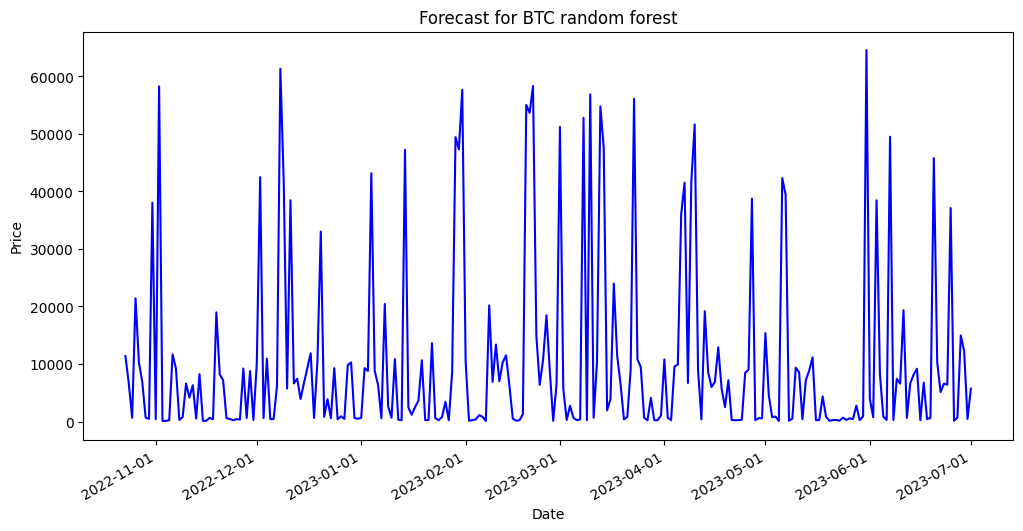

In [306]:
one_year_df_pred = pd.read_csv("one_year_pred1.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for BTC random forest")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-05-05   191.590387 

sell date and price of stock
             Predictions
Unnamed: 0              
2023-05-31  64286.994049


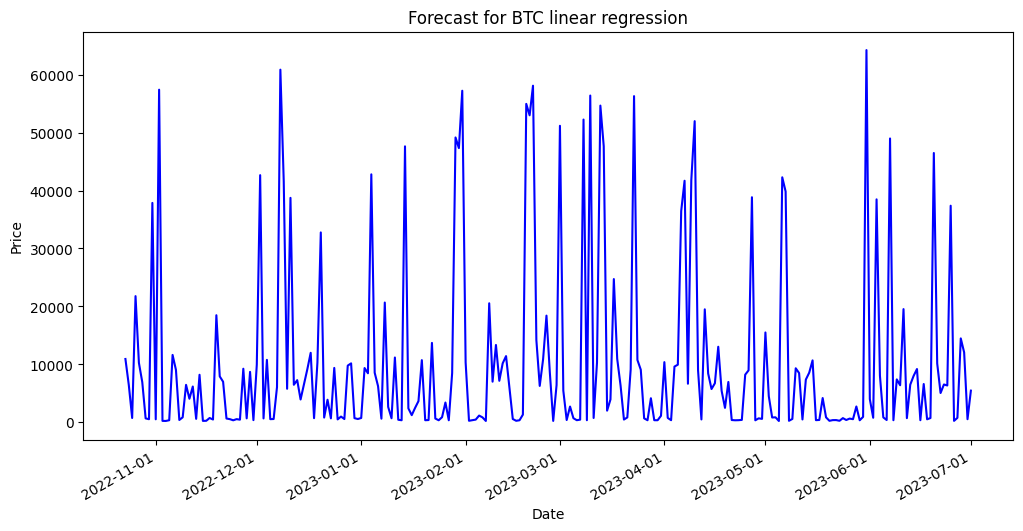

In [307]:
one_year_df_pred = pd.read_csv("one_year_pred2.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for BTC linear regression")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-05-05    90.134003 

sell date and price of stock
             Predictions
Unnamed: 0              
2023-05-31  64261.991193


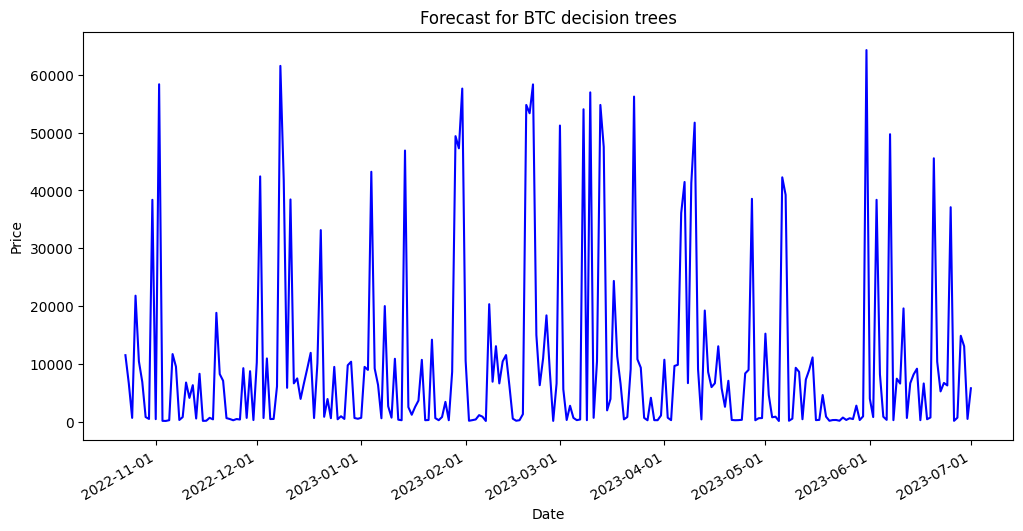

In [308]:
one_year_df_pred = pd.read_csv("one_year_pred3.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for BTC decision trees")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-05-05    89.229961 

sell date and price of stock
             Predictions
Unnamed: 0              
2023-05-31  63693.346112


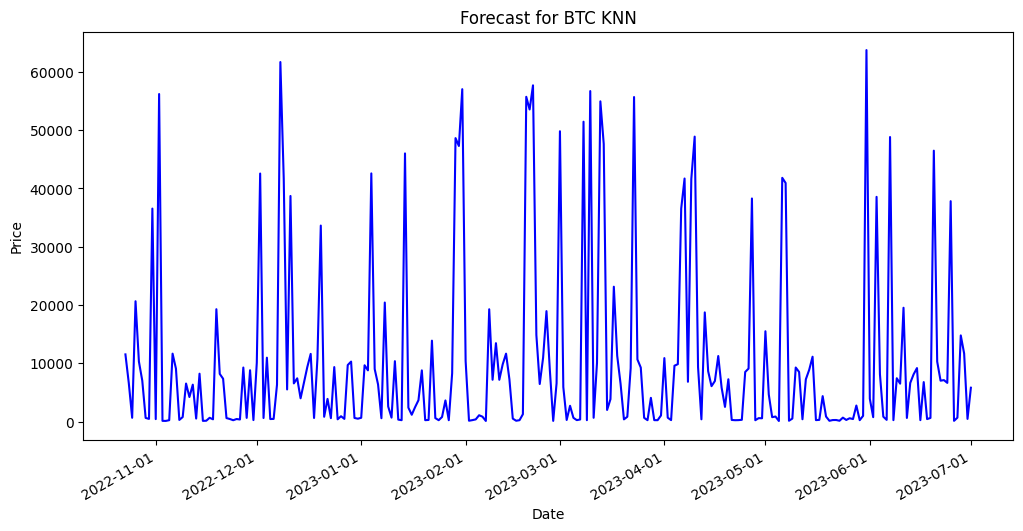

In [309]:
one_year_df_pred = pd.read_csv("one_year_pred4.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for BTC KNN")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-04-11     0.000106 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-06-02     0.385493


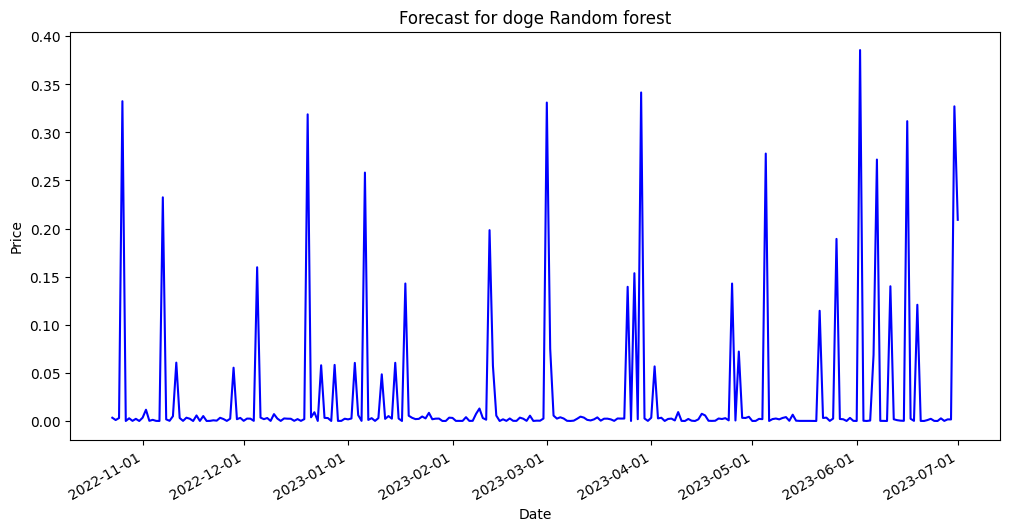

In [310]:
one_year_df_pred = pd.read_csv("one_year_pred5.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for doge Random forest")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-04-11     0.000204 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-06-02     0.388265


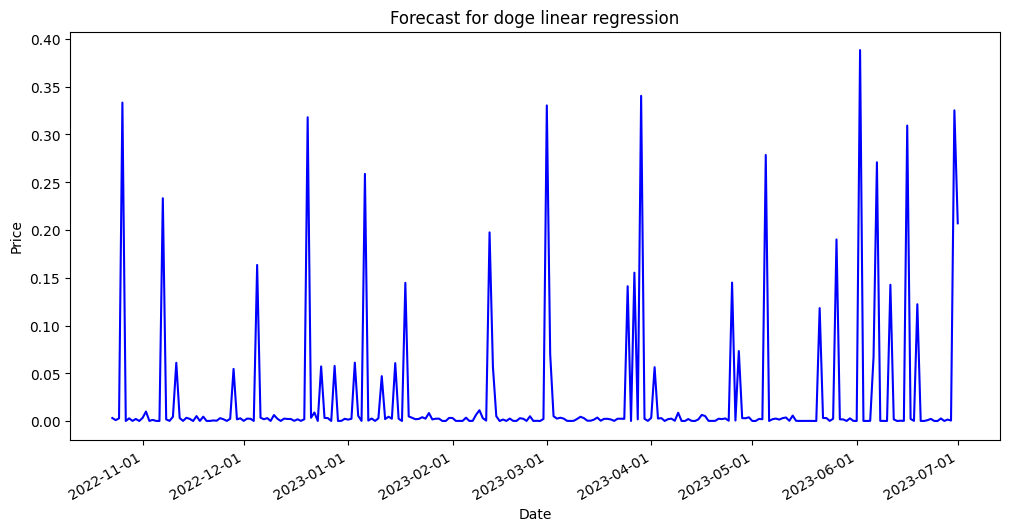

In [311]:
one_year_df_pred = pd.read_csv("one_year_pred6.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for doge linear regression")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-04-11     0.000107 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-06-02     0.385376


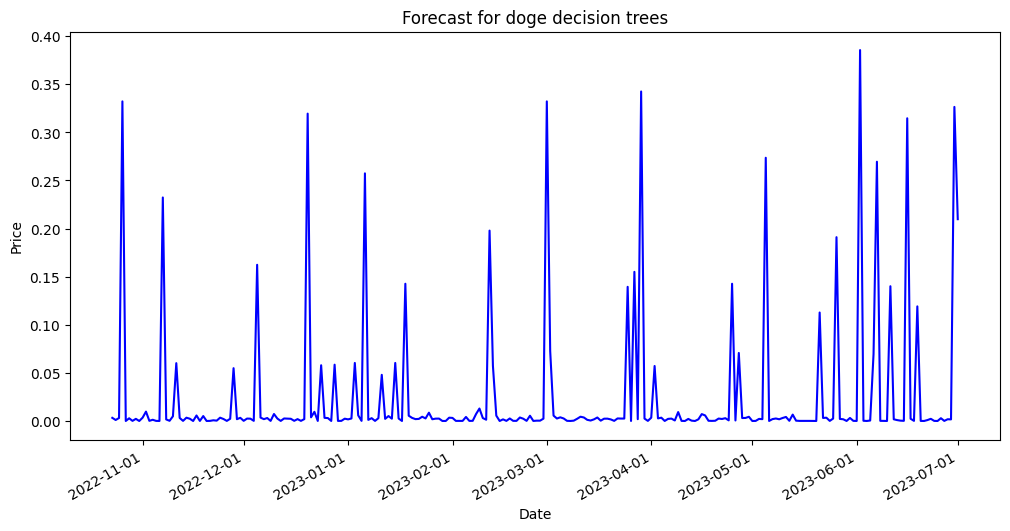

In [312]:
one_year_df_pred = pd.read_csv("one_year_pred7.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for doge decision trees")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-04-11     0.000106 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-06-02     0.380087


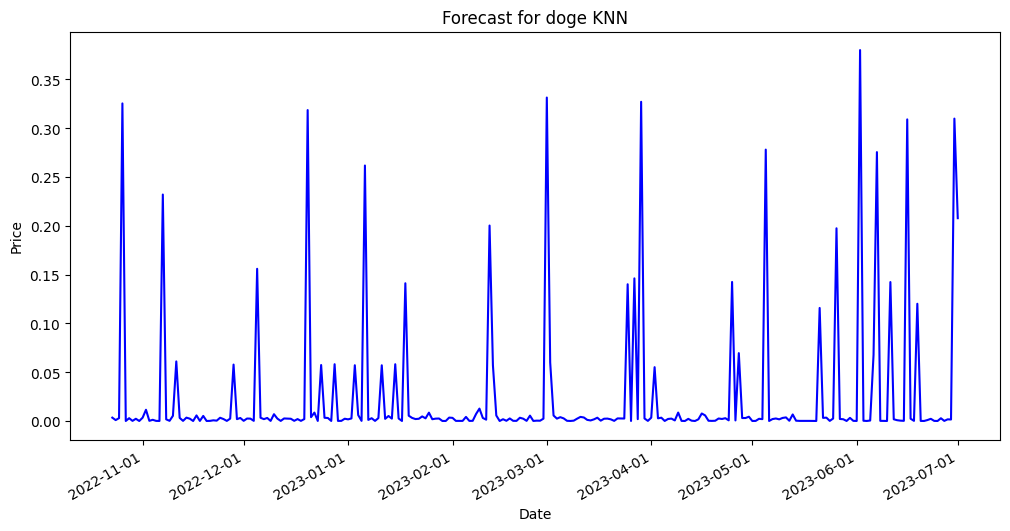

In [313]:
one_year_df_pred = pd.read_csv("one_year_pred8.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for doge KNN")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2022-12-29      0.00386 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-01-01     1.929051


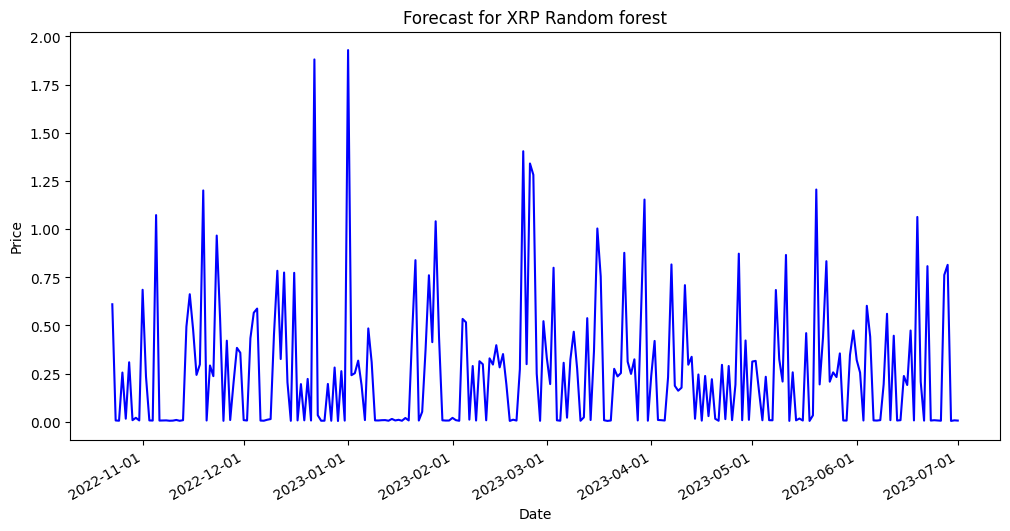

In [314]:
one_year_df_pred = pd.read_csv("one_year_pred9.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for XRP Random forest")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2022-12-29     0.004564 

sell date and price of stock
            Predictions
Unnamed: 0             
2022-12-22     2.085916


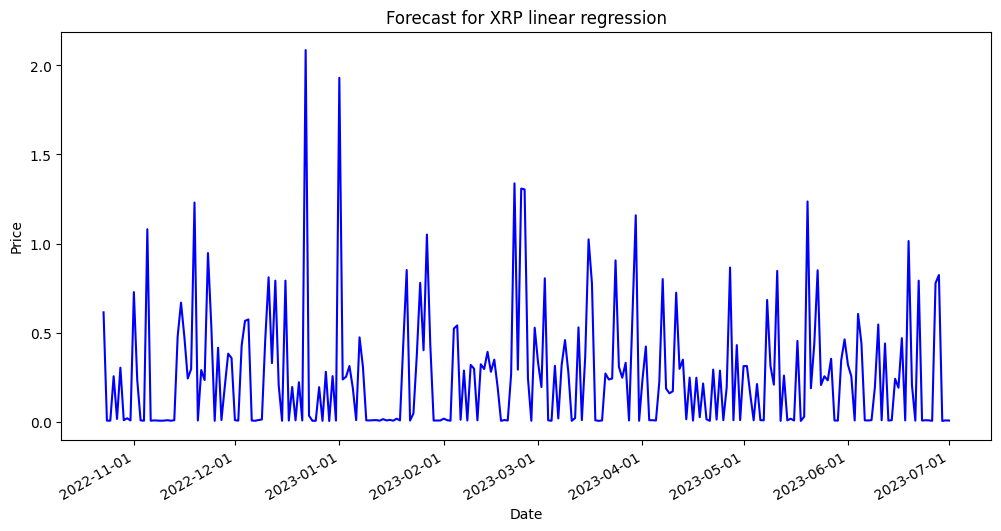

In [315]:
one_year_df_pred = pd.read_csv("one_year_pred10.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for XRP linear regression")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2022-12-29     0.003799 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-01-01      1.86119


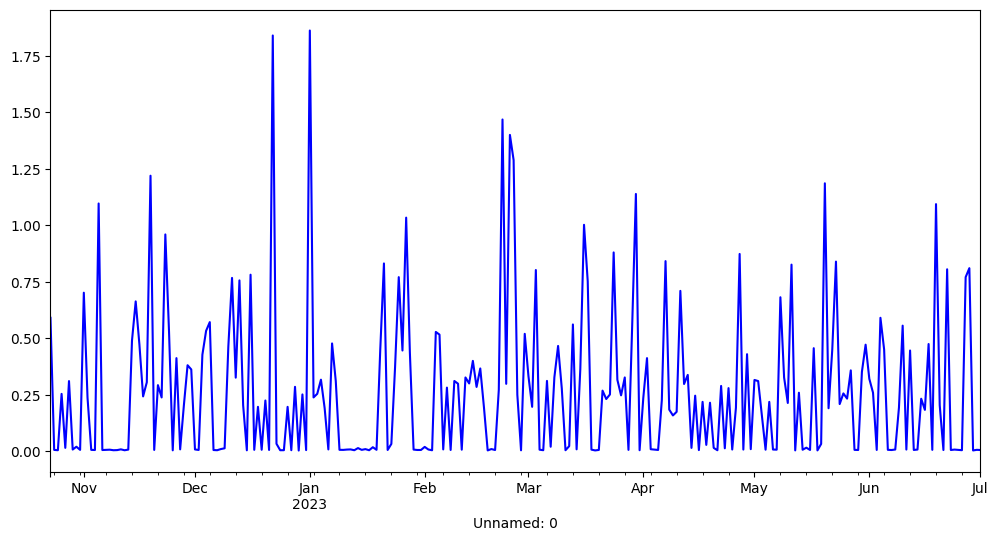

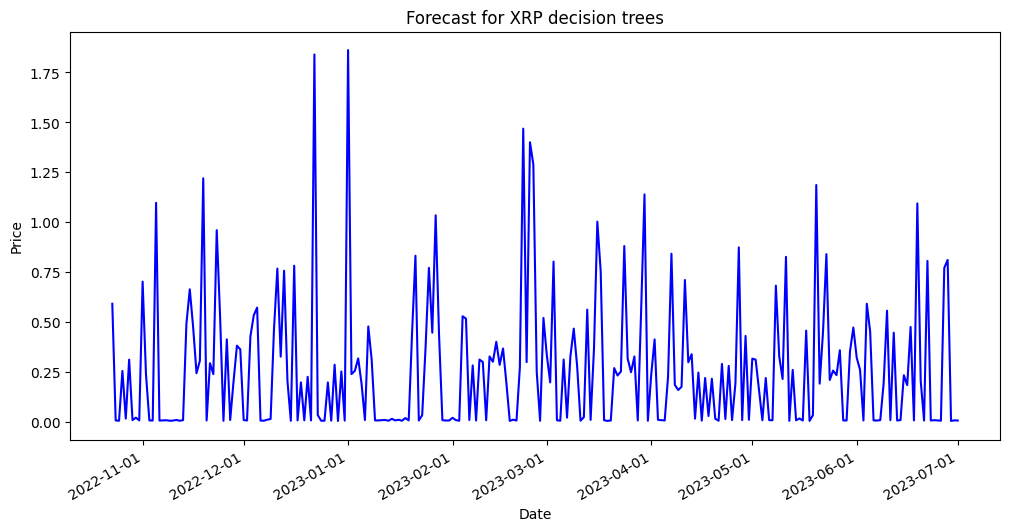

In [316]:
one_year_df_pred = pd.read_csv("one_year_pred11.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)
one_year_df_pred["Predictions"].plot(figsize=(12, 6), color="blue")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for XRP decision trees")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2022-12-29     0.003953 

sell date and price of stock
            Predictions
Unnamed: 0             
2023-01-01      1.94851


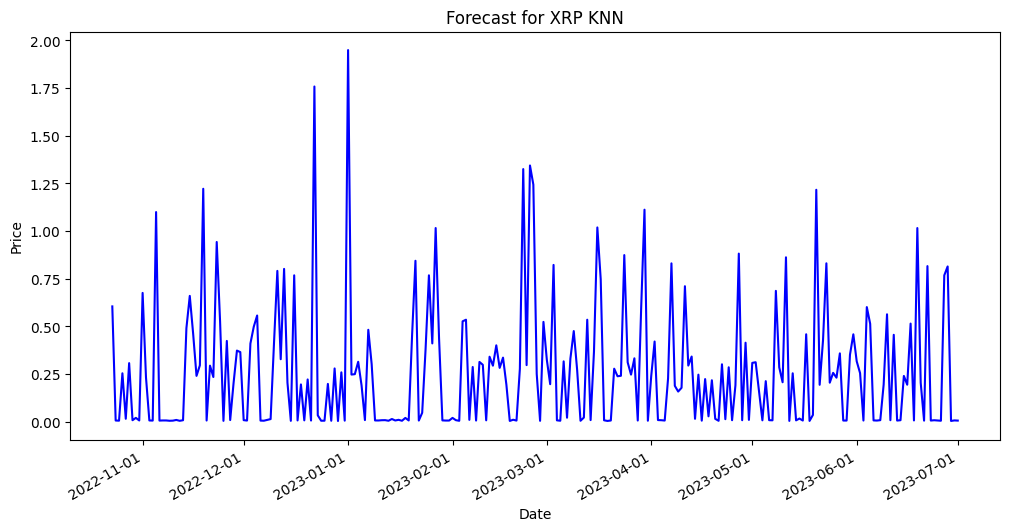

In [317]:
one_year_df_pred = pd.read_csv("one_year_pred12.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for XRP KNN")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-06-28     0.919583 

sell date and price of stock
            Predictions
Unnamed: 0             
2022-12-10     1.020415


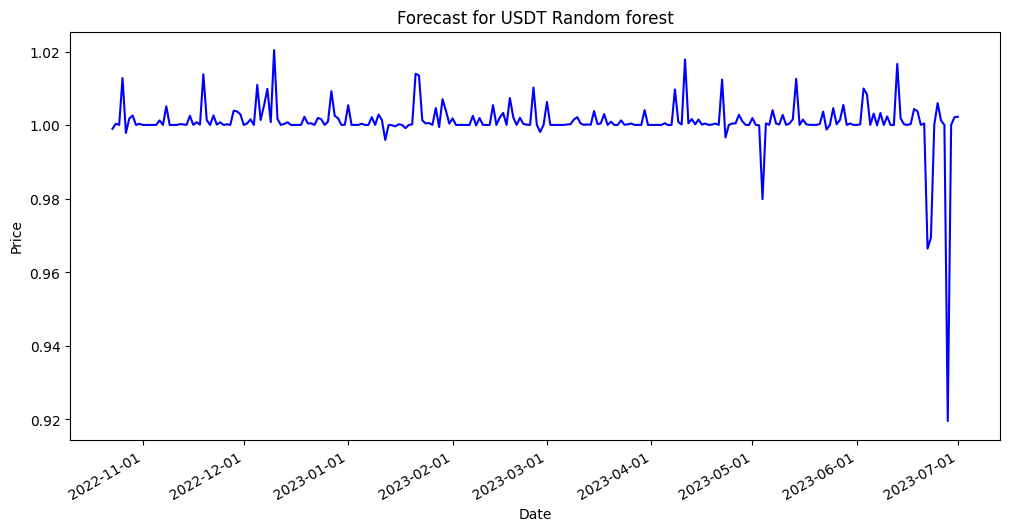

In [318]:
one_year_df_pred = pd.read_csv("one_year_pred13.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for USDT Random forest")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-06-28     0.920506 

sell date and price of stock
            Predictions
Unnamed: 0             
2022-12-10     1.025174


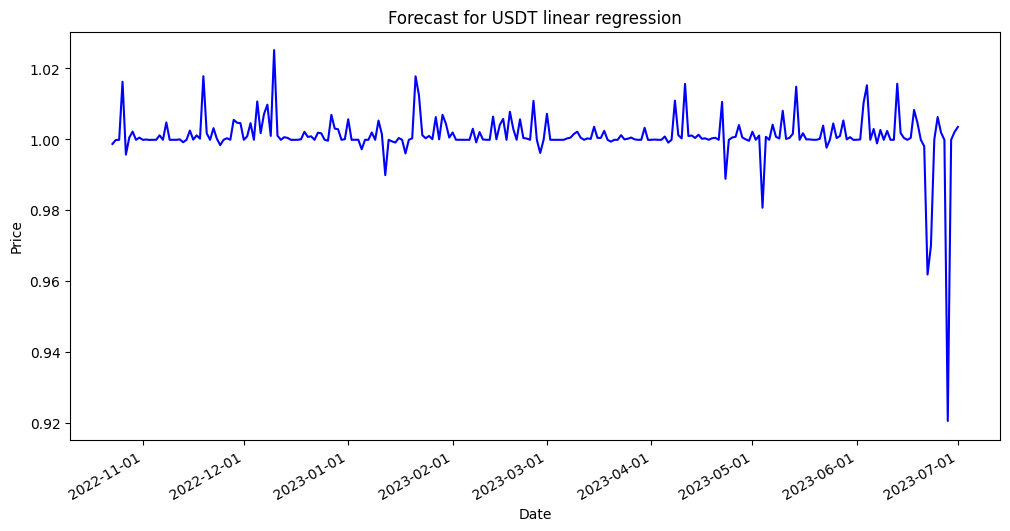

In [319]:
one_year_df_pred = pd.read_csv("one_year_pred14.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for USDT linear regression")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-06-28     0.913595 

sell date and price of stock
            Predictions
Unnamed: 0             
2022-12-10       1.0366


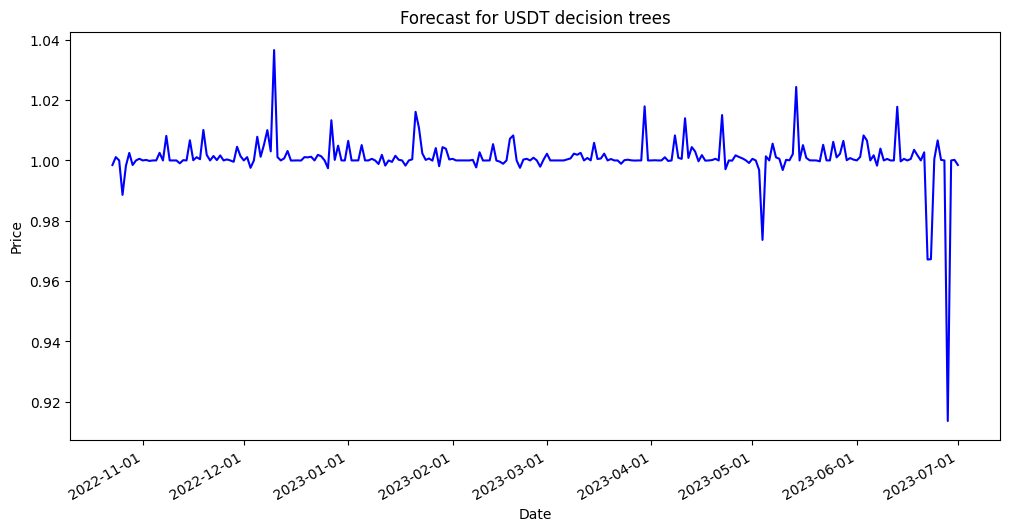

In [320]:
one_year_df_pred = pd.read_csv("one_year_pred15.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for USDT decision trees")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

Buy date and price of stock
            Predictions
Unnamed: 0             
2023-06-28     0.924746 

sell date and price of stock
            Predictions
Unnamed: 0             
2022-12-10     1.022932


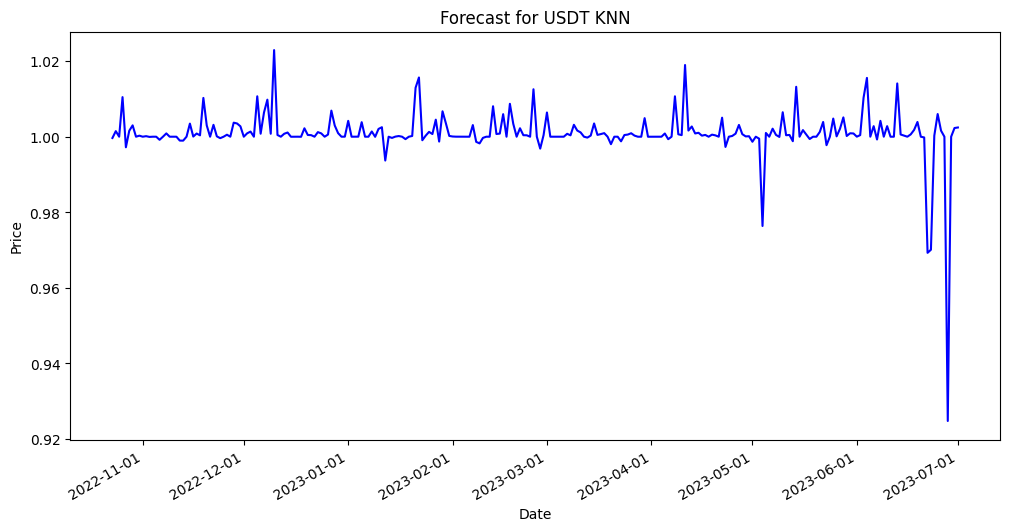

In [321]:
one_year_df_pred = pd.read_csv("one_year_pred16.csv")

# Parse the date column to datetime format
one_year_df_pred['Unnamed: 0'] = pd.to_datetime(one_year_df_pred['Unnamed: 0'])

# Set the date column as the index
one_year_df_pred.set_index('Unnamed: 0', inplace=True)

buy_price = min(one_year_df_pred["Predictions"])
sell_price = max(one_year_df_pred["Predictions"])
oneyear_buy = one_year_df_pred.loc[one_year_df_pred["Predictions"] == buy_price]
oneyear_sell = one_year_df_pred.loc[one_year_df_pred["Predictions"] == sell_price]

print("Buy date and price of stock")
print(oneyear_buy, "\n")
print("sell date and price of stock")
print(oneyear_sell)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(one_year_df_pred.index, one_year_df_pred["Predictions"], color="blue", label="Predictions")
plt.title("Forecast for USDT KNN")
plt.xlabel("Date")
plt.ylabel("Price")

# Format the dates on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()

### SELECTING THE BEST MODELS FOR SENTIMENT ANALYSIS COMPARISON

The model selection will be based on the accuracy. The best models realised are the:
- For BTC, the random forest with 98.78% accuracy
- For Doge, the random forest with 98.06% accuracy
- For XRP, the random forest with 98.05% accuracy
- For USDT, the random forest with 99.85% accuracy

The predictions for each of these will be used for the comparison between the fundamental(external factors) and technical analysis(internal factors).

In [322]:
filtered_df.head()

,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,2021-02-01,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,2021-02-01,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE
2,2021-02-01,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE
3,2021-02-01,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE
4,2021-02-01,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


#### SELECTING THE DATA WITH BTC FOR SENTIMENT COMPARISON

In [323]:
selected_coins = ["(bitcoin)","(btc)"]

In [324]:
btc_sent_df = filtered_df[filtered_df["new_coins"].isin(selected_coins)]

In [325]:
btc_sent_df.head()

,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,2021-02-01,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,2021-02-01,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE
2,2021-02-01,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE
4,2021-02-01,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
5,2021-02-01,7,the grayscale premium represents the differenc...,0,2,grayscale premium represents difference market...,16.0,0.000028,(bitcoin),"{'neg': 0.044, 'neu': 0.886, 'pos': 0.07, 'com...",0.2960,POSITIVE


In [326]:
btc_sent_df = btc_sent_df.rename(columns={"created_at":"date"})

In [327]:
#### merging btc price and btc sentiment dataframe
merged_btc = pd.merge(btc, btc_sent_df, on="date", how="inner")

In [328]:
merged_btc.head()

,date,open,high,low,close,volume,marketCap,crypto_name,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,2021-02-01,33114.577243,34638.213485,32384.228106,33537.17682,6.140040e+10,6.243490e+11,0,154,#privacy is a human right. learn how to make y...,18,23,privacy human right learn make bitcoin transac...,340.0,0.000588,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,2021-02-01,33114.577243,34638.213485,32384.228106,33537.17682,6.140040e+10,6.243490e+11,0,17,"overall btc trading volume has increased, but ...",1,5,overall btc trading volume increased average t...,39.5,0.000068,(btc),"{'neg': 0.0, 'neu': 0.95, 'pos': 0.05, 'compou...",0.2124,POSITIVE
2,2021-02-01,33114.577243,34638.213485,32384.228106,33537.17682,6.140040e+10,6.243490e+11,0,3,"on average, the return distribution of btc ske...",0,1,average return distribution btc skews slightly...,7.0,0.000012,(btc),"{'neg': 0.053, 'neu': 0.769, 'pos': 0.177, 'co...",0.7010,POSITIVE
3,2021-02-01,33114.577243,34638.213485,32384.228106,33537.17682,6.140040e+10,6.243490e+11,0,0,rt @reg_mati: la privacidad es un derecho huma...,0,7,rt reg_mati la privacidad e un derecho humano ...,7.0,0.000012,(bitcoin),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
4,2021-02-01,33114.577243,34638.213485,32384.228106,33537.17682,6.140040e+10,6.243490e+11,0,7,the grayscale premium represents the differenc...,0,2,grayscale premium represents difference market...,16.0,0.000028,(bitcoin),"{'neg': 0.044, 'neu': 0.886, 'pos': 0.07, 'com...",0.2960,POSITIVE


In [329]:
encoder = LabelEncoder()

In [330]:
merged_btc["sentiment_type"] = encoder.fit_transform(merged_btc["sentiment_type"])

In [331]:
#### coefficient for correlation between sentiment and price column
spearman_corr = merged_btc["sentiment_type"].corr(merged_btc["close"], method="spearman")

In [332]:
spearman_corr

0.07991250558491513

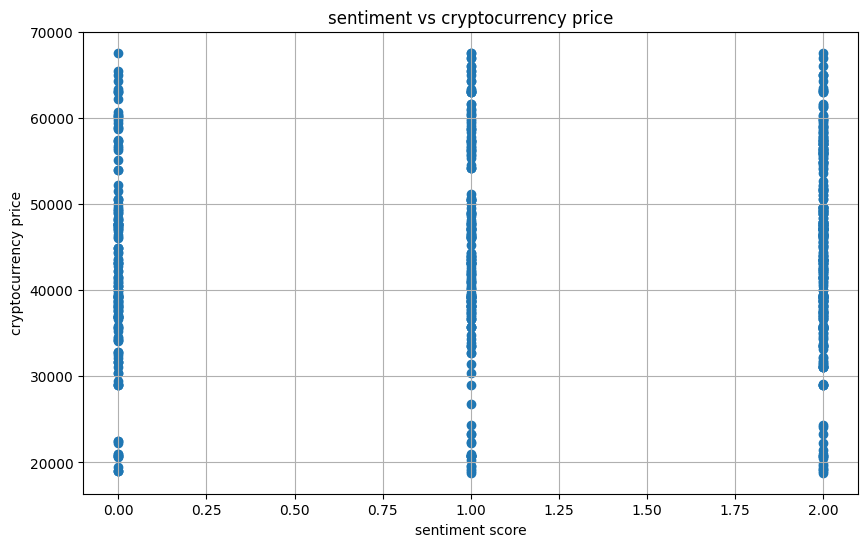

In [333]:
### scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_btc["sentiment_type"], merged_btc["close"], alpha=1.0)
plt.title("sentiment vs cryptocurrency price")
plt.xlabel("sentiment score")
plt.ylabel("cryptocurrency price")
plt.grid(True)
plt.show()

#### SELECTING THE DATA WITH DOGE FOR SENTIMENT COMPARISON

In [334]:
doge_sent_df = filtered_df[filtered_df["new_coins"] == "(doge)"]

In [335]:
doge_sent_df.head()

,created_at,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
3,2021-02-01,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE
125,2021-02-18,3,normally a cryptocurrency becomes less concent...,0,0,normally cryptocurrency becomes le concentrate...,6.0,0.000010,(doge),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
127,2021-02-18,9,"according to @coinmetrics, the price of doge i...",0,1,according coinmetrics price doge 1200 ytd hash...,19.0,0.000033,(doge),"{'neg': 0.077, 'neu': 0.792, 'pos': 0.131, 'co...",0.2960,POSITIVE
355,2021-04-16,12,how it started: ðµðµðµð\nhow it's goi...,1,7,started ðµðµðµð going ððð ð doge coindeskresea...,31.5,0.000055,(doge),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
372,2021-04-20,6,is the frenetic activity in doge just an excha...,1,2,frenetic activity doge exchangebased phenomeno...,14.5,0.000025,(doge),"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.5106,POSITIVE


In [336]:
doge_sent_df = doge_sent_df.rename(columns={"created_at":"date"})

In [337]:
#### merging doge price and btc sentiment dataframe
merged_doge = pd.merge(doge, doge_sent_df, on="date", how="inner")

In [338]:
merged_doge.head()

,date,open,high,low,close,volume,marketCap,crypto_name,favorite_count,full_text,reply_count,retweet_count,clean_text,importance_coefficient,importance_coefficient_normalized,new_coins,scores,compound,sentiment_type
0,2021-02-01,0.037054,0.043250,0.033367,0.034875,6.319224e+09,4.470660e+09,0,3496,i sent some! https://t.co/mfyrz35zjf\n\nyou sh...,731,686,sent httpstcomfyrz35zjf givedirectly great wor...,8043.5,0.013905,(doge),"{'neg': 0.06, 'neu': 0.856, 'pos': 0.084, 'com...",0.2225,POSITIVE
1,2021-02-18,0.049363,0.061799,0.048989,0.059541,4.551944e+09,7.646764e+09,0,3,normally a cryptocurrency becomes less concent...,0,0,normally cryptocurrency becomes le concentrate...,6.0,0.000010,(doge),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
2,2021-02-18,0.049363,0.061799,0.048989,0.059541,4.551944e+09,7.646764e+09,0,9,"according to @coinmetrics, the price of doge i...",0,1,according coinmetrics price doge 1200 ytd hash...,19.0,0.000033,(doge),"{'neg': 0.077, 'neu': 0.792, 'pos': 0.131, 'co...",0.2960,POSITIVE
3,2021-04-16,0.181587,0.437700,0.180488,0.365870,6.941068e+10,4.727407e+10,0,12,how it started: ðµðµðµð\nhow it's goi...,1,7,started ðµðµðµð going ððð ð doge coindeskresea...,31.5,0.000055,(doge),"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
4,2021-04-20,0.408435,0.422347,0.271618,0.319500,2.813065e+10,4.130043e+10,0,6,is the frenetic activity in doge just an excha...,1,2,frenetic activity doge exchangebased phenomeno...,14.5,0.000025,(doge),"{'neg': 0.0, 'neu': 0.865, 'pos': 0.135, 'comp...",0.5106,POSITIVE


In [339]:
merged_doge["sentiment_type"] = encoder.fit_transform(merged_doge["sentiment_type"])

In [340]:
#### coefficient for correlation between sentiment and price column
spearman_corr = merged_doge["sentiment_type"].corr(merged_doge["close"], method="spearman")

In [341]:
spearman_corr

-0.3125101624363858

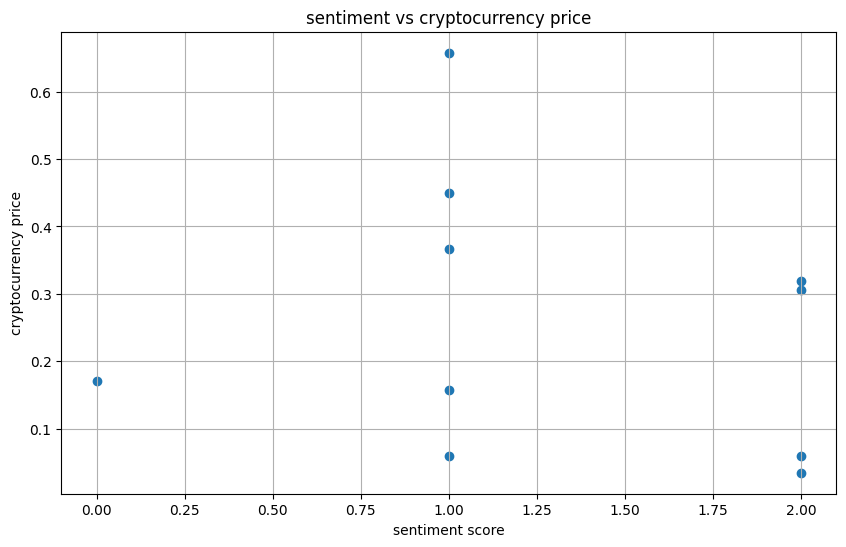

In [342]:
### scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_doge["sentiment_type"], merged_doge["close"], alpha=1.0)
plt.title("sentiment vs cryptocurrency price")
plt.xlabel("sentiment score")
plt.ylabel("cryptocurrency price")
plt.grid(True)
plt.show()